# Data Mining Project
## From Reservation to Check-In: Data-Driven Insights for Optimizing Hotel Bookings - Predicting Cancellations and Understanding Customer Preferences
### Asif Mursalin - 60100148
### Ashraf Salem - 60104564
### Mehdi Bouktib - 60105112 

```bash
pip install -r requirements.txt
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```

In [184]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import copy

In [185]:
df = pd.read_csv("hotel_bookings_raw.csv")

First 5 rows

In [186]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


Last 10 rows

In [187]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [188]:
df.shape

(119390, 43)

# Hotel Booking Dataset Column Descriptions

## 1. Booking Status and Basic Information
- `hotel`: Type of hotel
- `is_canceled`: Whether the booking was canceled (binary: 0/1)
- `reservation_status`: Current status of the reservation
- `reservation_status_date`: Date of the last status update

## 2. Temporal Information
- `lead_time`: Number of days between booking and arrival date
- `arrival_date_year`: Year of arrival
- `arrival_date_month`: Month of arrival
- `arrival_date_week_number`: Week number of arrival
- `arrival_date_day_of_month`: Day of month of arrival
- `MO_YR`: Month and year combined

## 3. Stay Details
- `stays_in_weekend_nights`: Number of weekend nights booked
- `stays_in_week_nights`: Number of weekday nights booked
- `adults`: Number of adults
- `children`: Number of children
- `babies`: Number of babies

## 4. Room and Service Information
- `meal`: Type of meal plan
- `reserved_room_type`: Type of room reserved
- `assigned_room_type`: Type of room actually assigned
- `required_car_parking_spaces`: Number of parking spaces needed
- `total_of_special_requests`: Number of special requests made

## 5. Customer Information
- `country`: Country of origin
- `is_repeated_guest`: Whether the guest has stayed before
- `previous_cancellations`: Number of previous cancellations
- `previous_bookings_not_canceled`: Number of previous non-canceled bookings
- `customer_type`: Type of customer

## 6. Business/Distribution Information
- `market_segment`: Market segment (e.g., direct, corporate)
- `distribution_channel`: Booking distribution channel
- `agent`: ID of the travel agency
- `booking_changes`: Number of changes made to the booking
- `deposit_type`: Type of deposit made
- `adr`: Average Daily Rate
- `days_in_waiting_list`: Days spent on waiting list

## 7. Economic Indicators
- `CPI_AVG`: Consumer Price Index average
- `INFLATION`: Inflation rate
- `INFLATION_CHG`: Change in inflation
- `CSMR_SENT`: Consumer sentiment
- `UNRATE`: Unemployment rate
- `INTRSRT`: Interest rate
- `GDP`: Gross Domestic Product
- `FUEL_PRCS`: Fuel prices
- `CPI_HOTELS`: CPI specific to hotels
- `US_GINI`: Gini coefficient (income inequality measure)
- `DIS_INC`: Disposable income

In [189]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'MO_YR', 'CPI_AVG',
       'INFLATION', 'INFLATION_CHG', 'CSMR_SENT', 'UNRATE', 'INTRSRT', 'GDP',
       'FUEL_PRCS', 'CPI_HOTELS', 'US_GINI', 'DIS_INC'],
      dtype='object')

In [190]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [191]:
df['agent'] = df['agent'].astype('Int64')

In [192]:
binary_columns = ['is_canceled', 'is_repeated_guest']

date_columns = [
    'reservation_status_date'
]

numeric_columns = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'CPI_AVG',
    'INFLATION',
    'INFLATION_CHG',
    'CSMR_SENT',
    'UNRATE',
    'INTRSRT',
    'GDP',
    'FUEL_PRCS',
    'CPI_HOTELS',
    'US_GINI',
    'DIS_INC'
]

categorical_columns = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
    'agent' 
]

In [193]:
def fix_datatypes(df):
    df = copy.deepcopy(df)
    
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
    
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    for col in categorical_columns:
        df[col] = df[col].astype('category')
    
    for col in binary_columns:
        df[col] = df[col].astype('bool')
    df['MO_YR'] = df['MO_YR'].astype(str)
    
    return df

In [194]:
df = fix_datatypes(df)
df.dtypes

hotel                                   category
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

In [195]:
booking_by_month = df.groupby(['arrival_date_month', 'hotel']).size()
booking_by_month

C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\3460393484.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



arrival_date_month  hotel       
April               City Hotel      7480
                    Resort Hotel    3609
August              City Hotel      8983
                    Resort Hotel    4894
December            City Hotel      4132
                    Resort Hotel    2648
February            City Hotel      4965
                    Resort Hotel    3103
January             City Hotel      3736
                    Resort Hotel    2193
July                City Hotel      8088
                    Resort Hotel    4573
June                City Hotel      7894
                    Resort Hotel    3045
March               City Hotel      6458
                    Resort Hotel    3336
May                 City Hotel      8232
                    Resort Hotel    3559
November            City Hotel      4357
                    Resort Hotel    2437
October             City Hotel      7605
                    Resort Hotel    3555
September           City Hotel      7400
                    Reso

In [196]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure()


for hotel_type in df['hotel'].unique():
    hotel_data = df[df['hotel'] == hotel_type]
    monthly_counts = hotel_data['arrival_date_month'].value_counts().reset_index()
    monthly_counts.columns = ['Month', 'Bookings']
    

    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    monthly_counts['Month'] = pd.Categorical(monthly_counts['Month'], 
                                           categories=month_order, 
                                           ordered=True)
    monthly_counts = monthly_counts.sort_values('Month')
    
    fig.add_trace(
        go.Bar(
            name=hotel_type,
            x=monthly_counts['Month'],
            y=monthly_counts['Bookings'],
            visible=True
        )
    )


fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list([
                dict(
                    label="All Hotels",
                    method="update",
                    args=[{"visible": [True, True]},
                          {"title": "All Hotels Booking Distribution"}]),
                dict(
                    label="Resort Hotel",
                    method="update",
                    args=[{"visible": [True, False]},
                          {"title": "Resort Hotel Booking Distribution"}]),
                dict(
                    label="City Hotel",
                    method="update",
                    args=[{"visible": [False, True]},
                          {"title": "City Hotel Booking Distribution"}])
            ]),
        )
    ]
)


fig.update_layout(
    title="Hotel Bookings Distribution",
    xaxis_title="Month",
    yaxis_title="Number of Bookings",
    barmode='group',
    height=600,
    width=1000,
    showlegend=True
)

fig.show()

# Dealing with missing values

In [197]:
missing_values_count = df.isnull().sum()[df.isnull().sum()>0]
total_missing = df.isnull().sum().sum() 

print("Missing values per column:\n", missing_values_count)
print("Total missing values:", total_missing)


Missing values per column:
 children             4
country            488
agent            16340
CPI_AVG            181
INFLATION          181
INFLATION_CHG      181
CSMR_SENT          181
UNRATE             181
INTRSRT            181
GDP                181
FUEL_PRCS          181
CPI_HOTELS         181
US_GINI            181
DIS_INC            181
dtype: int64
Total missing values: 18823


## Visualizing missing values in a column

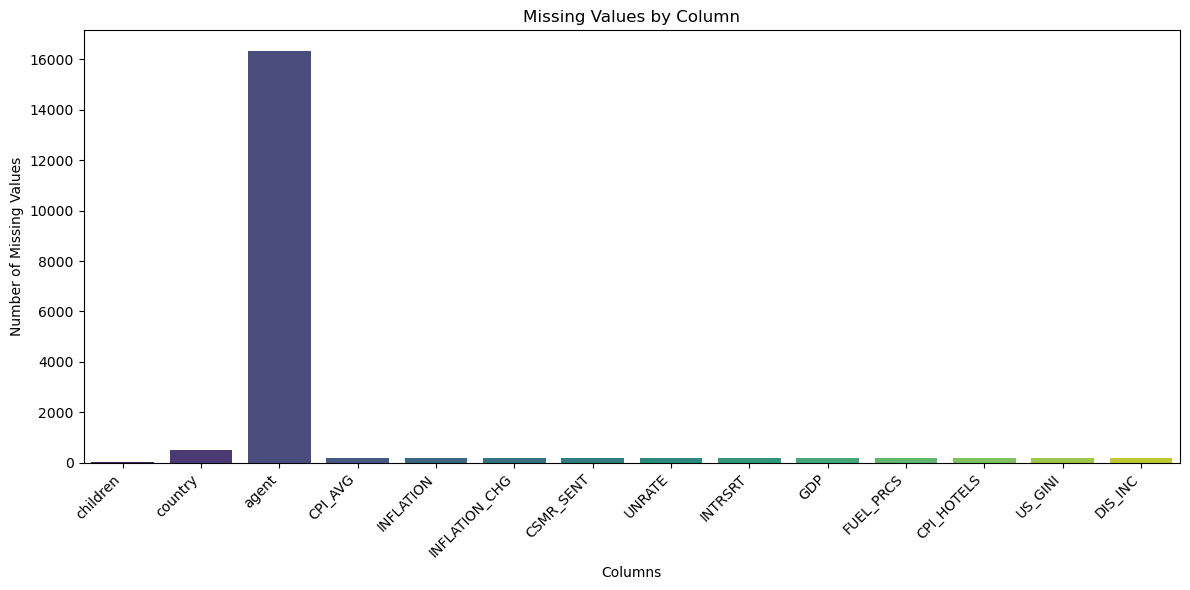

In [198]:
plt.figure(figsize=(12, 6))

sns.barplot(x=missing_values_count.index, 
            y=missing_values_count.values,
            hue=missing_values_count.index,
            palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()

- The children column contains the number of children the guest will bring
- We will asssume the null value means the guest has no children

## Children Missing Values

In [199]:
# Fill children column missing values
# df['children'].fillna(0, inplace=True)
df['children'] = df['children'].fillna(0)

## Country missing Values

In [200]:
# Replace missing values with the mode of the column country
mode_country = df['country'].mode()[0]
print(mode_country)
df['country'] = df['country'].fillna(mode_country)

PRT


## Agent Missing Values

In [201]:
df['agent'] = df['agent'].astype('object')  # temporarily convert to object
df['agent'] = df['agent'].fillna(0)

df['agent'] = df['agent'].astype('category')

C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\2899670480.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [202]:
df[['agent']].head()

,agent
0,0
1,0
2,0
3,304
4,240


Replacing missing values with '0' of the column Agent as it states that no agent was involved in the booking

In [203]:
missing_values_count = df.isnull().sum()[df.isnull().sum()>0]
total_missing = df.isnull().sum().sum() 

print("Missing values per column:\n", missing_values_count)
print("Total missing values:", total_missing)

Missing values per column:
 CPI_AVG          181
INFLATION        181
INFLATION_CHG    181
CSMR_SENT        181
UNRATE           181
INTRSRT          181
GDP              181
FUEL_PRCS        181
CPI_HOTELS       181
US_GINI          181
DIS_INC          181
dtype: int64
Total missing values: 1991


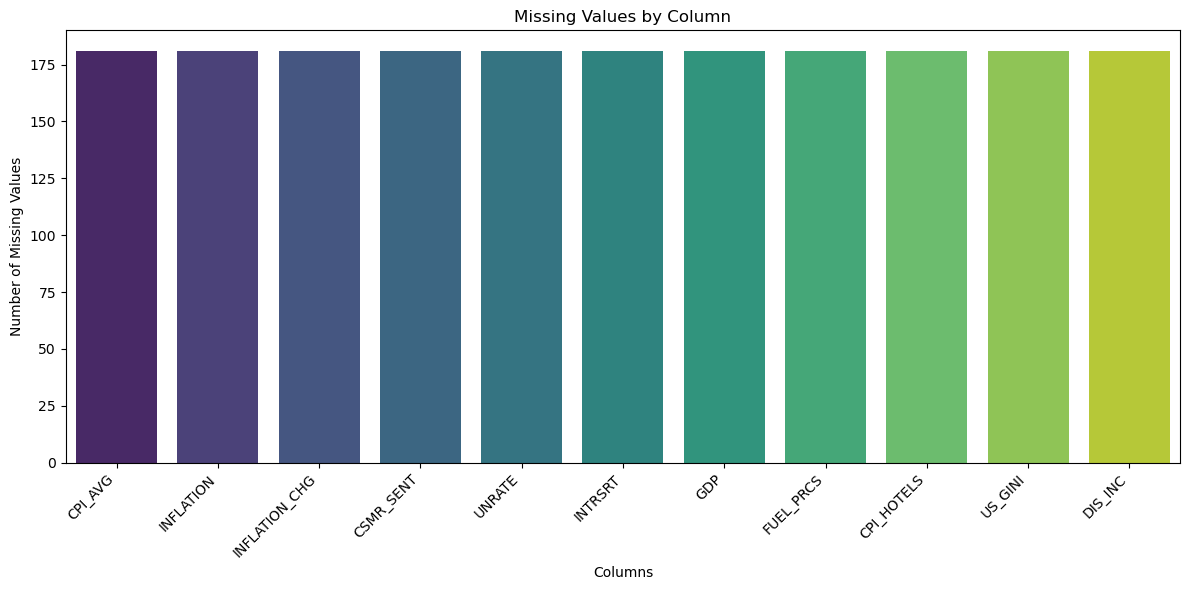

In [204]:
plt.figure(figsize=(12, 6))

sns.barplot(x=missing_values_count.index, 
            y=missing_values_count.values,
            hue=missing_values_count.index,
            palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()

## CPI_AVG
- replacing the null values in the CPI_AVG columns that indicates consumer price index average with mean as it maintains the dataset's overall balance and avoids skewing results

In [205]:
mean_CPI = df['CPI_AVG'].mean()
print(mean_CPI)
df['CPI_AVG'] = df['CPI_AVG'].fillna(mean_CPI)

240.78065240879465


# Inflation
- replacing null values in the Inflation column with Interpolation as it Estimates missing values based on surrounding data points, preserving the column’s natural trends over time

In [206]:
df['INFLATION'] = df['INFLATION'].interpolate(method='linear')
print(df['INFLATION'].isnull().sum())


0


# CSMR_SENT (costumer sentiment)


In [207]:
# Replace missing values with the mode of the column CSMR_SENT
mode_csmr = df['CSMR_SENT'].mode()[0]
print(mode_csmr)
df['CSMR_SENT'] = df['CSMR_SENT'].fillna(mode_csmr)

90.0


# UNRATE (Unemployment rate) 
- replacing the null values in the UNRATE column that indicates Unemployment rate with mean as it maintains the dataset's overall balance and avoids skewing results

In [208]:
Unrate_Mean = df['UNRATE'].mean()
print(Unrate_Mean)
df['UNRATE'] = df['UNRATE'].fillna(Unrate_Mean)

4.827967687003499


Text(0, 0.5, 'Count')

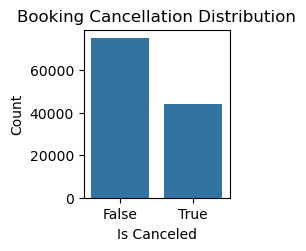

In [209]:
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation Distribution')
plt.xlabel('Is Canceled')
plt.ylabel('Count')

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     14907
        True       0.98      0.90      0.93      8971

    accuracy                           0.95     23878
   macro avg       0.96      0.94      0.95     23878
weighted avg       0.95      0.95      0.95     23878



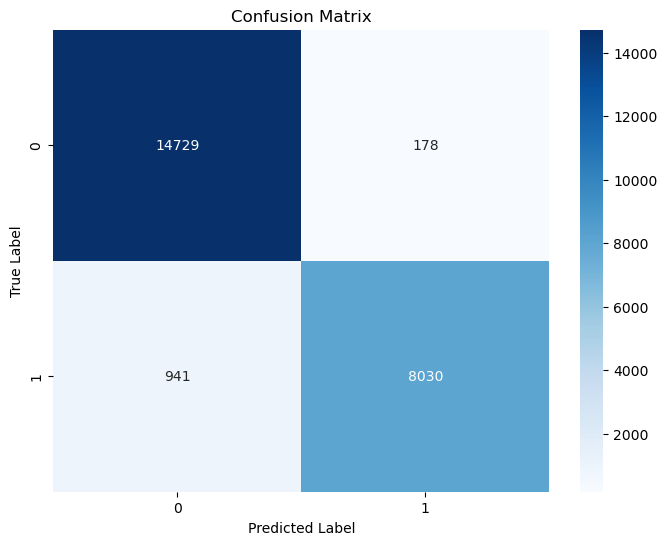

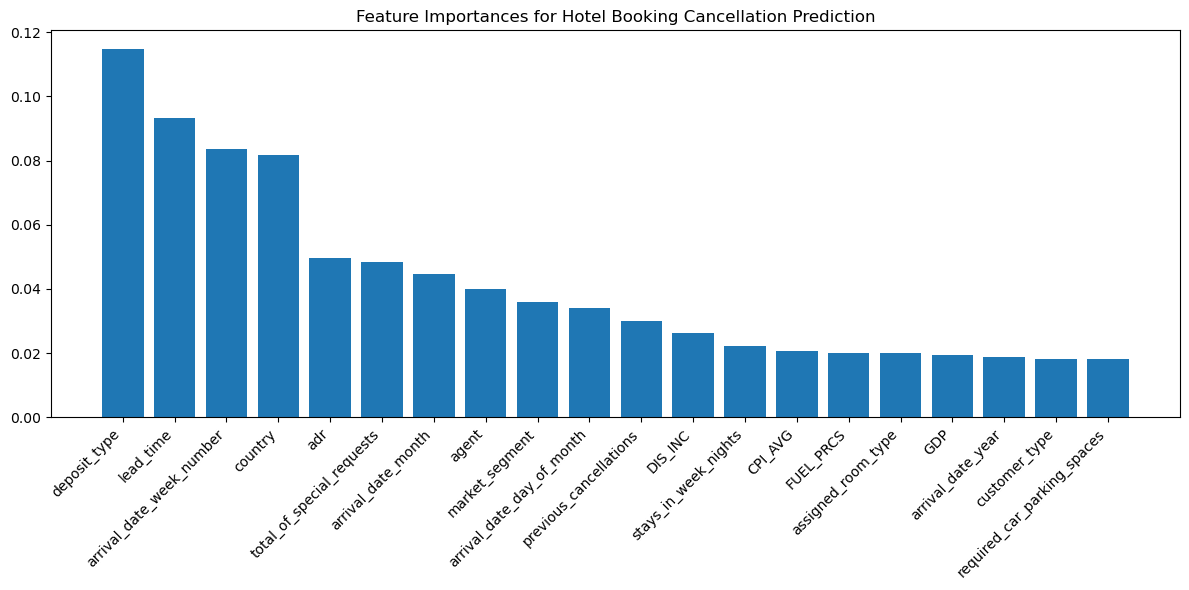


Top 20 Most Important Features:
deposit_type: 0.1149
lead_time: 0.0934
arrival_date_week_number: 0.0837
country: 0.0817
adr: 0.0498
total_of_special_requests: 0.0485
arrival_date_month: 0.0446
agent: 0.0398
market_segment: 0.0360
arrival_date_day_of_month: 0.0340
previous_cancellations: 0.0299
DIS_INC: 0.0263
stays_in_week_nights: 0.0221
CPI_AVG: 0.0208
FUEL_PRCS: 0.0201
assigned_room_type: 0.0200
GDP: 0.0194
arrival_date_year: 0.0188
customer_type: 0.0183
required_car_parking_spaces: 0.0182


In [210]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

def prepare_data(df):
    df_model = df.copy()
    columns_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
    le = LabelEncoder()
    for column in categorical_columns:
        if column in df_model.columns:
            df_model[column] = le.fit_transform(df_model[column].astype(str))
    
    return df_model

def train_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return rf, X_train, X_test, y_train, y_test, y_pred

def plot_feature_importance(rf, feature_names):
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances for Hotel Booking Cancellation Prediction")
    plt.bar(range(20), importances[indices][:20])
    plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("\nTop 20 Most Important Features:")
    for i in range(20):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

def analyze_cancellations():
    df_model = prepare_data(df)
    X = df_model.drop('is_canceled', axis=1)
    y = df_model['is_canceled']
    rf, X_train, X_test, y_train, y_test, y_pred = train_random_forest(X, y)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    plot_feature_importance(rf, X.columns)
    return rf, X, y


rf_model, X, y = analyze_cancellations()

The strongest predictors of whether a booking will be cancelled are:
- (deposit, room rate)
- timing-related features (lead time, arrival dates). 

The type of deposit and how far in advance someone books (lead time) likely reflects their commitment level to the reservation.

# Customer Segmentation

### Country of origin (top booking countries)


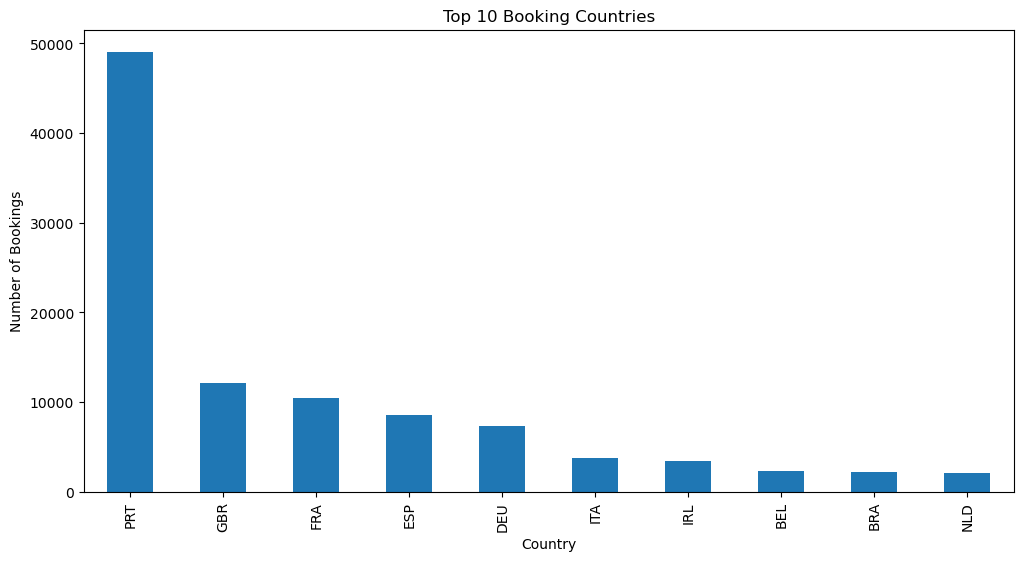

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

In [211]:
def country_analysis(dataframe):
    # Count bookings by country
    country_counts = dataframe['country'].value_counts().head(10)
    
    plt.figure(figsize=(12,6))
    country_counts.plot(kind='bar')
    plt.title('Top 10 Booking Countries')
    plt.xlabel('Country')
    plt.ylabel('Number of Bookings')
    plt.show()
    
    return country_counts
country_analysis(df)


### Customer type
- There are 4 types of Customer : 
1) Transient:  Individual or small group travelers booking short stays that its mostly for business.
2) Transient Party: Similar to Transient but refers to a smaller group travelling together 
3) Contract: Guests whos stays depending on a pre-negotiated agreements for example airline crews
4) Group: Larger groups of people booking for an event that its often multiple rooms and services 

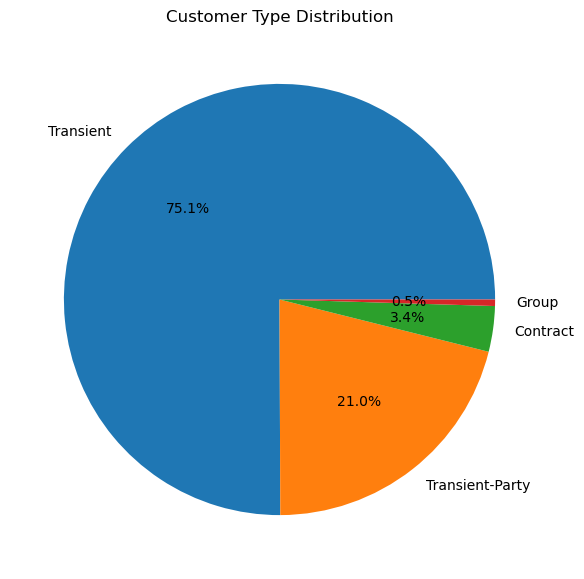

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [212]:
def customer_type_analysis(df):
    customer_type_dist = df['customer_type'].value_counts()
    
    plt.figure(figsize=(10,7))
    customer_type_dist.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Customer Type Distribution')
    plt.ylabel('')
    plt.show()
    
    return customer_type_dist

customer_type_analysis(df)


### Repeated customers

C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\4213682671.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



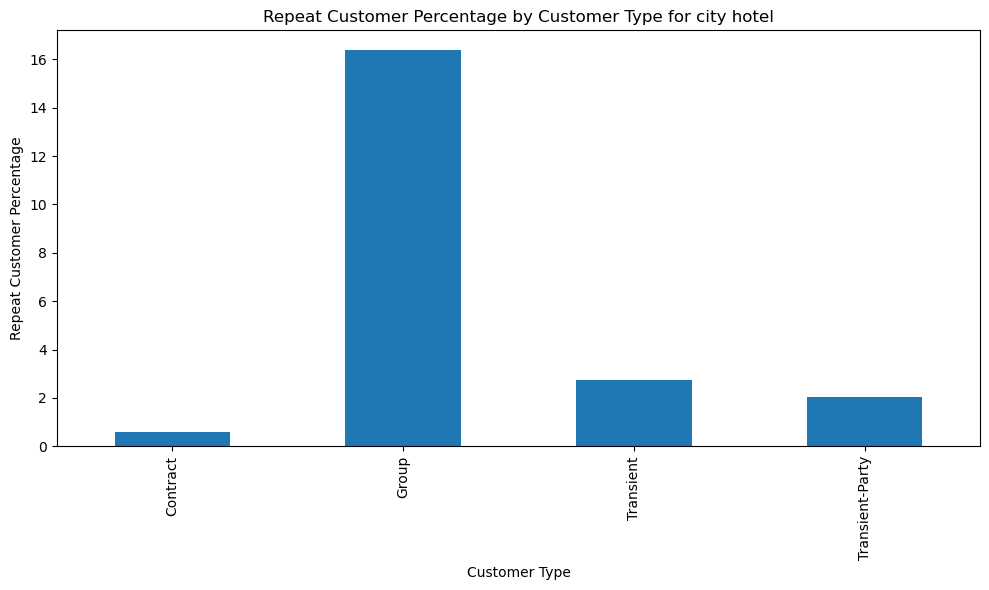

In [213]:
def city_repeat_customer_analysis(df):
    city_hotel = df[df['hotel']=='City Hotel']

    city_repeat_customers = city_hotel.groupby('customer_type')['is_repeated_guest'].mean() * 100 # For Percentage view
    
    plt.figure(figsize=(10,6))
    city_repeat_customers.plot(kind='bar')
    plt.title('Repeat Customer Percentage by Customer Type for city hotel')
    plt.xlabel('Customer Type')
    plt.ylabel('Repeat Customer Percentage')
    plt.tight_layout()
    plt.show()
    
    return city_repeat_customers

city_repeat_customers = city_repeat_customer_analysis(df)


C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\4095704785.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



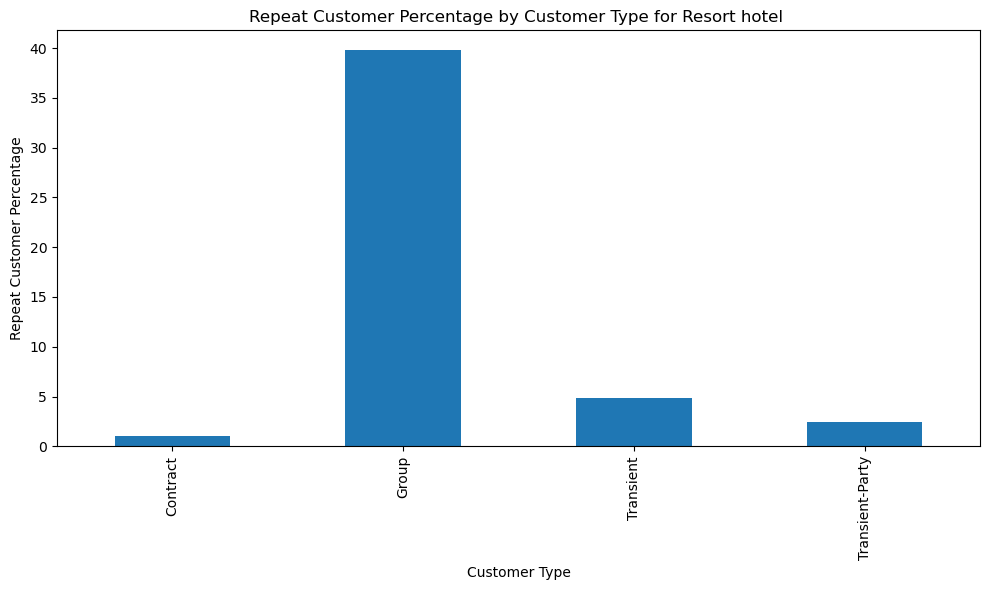

In [214]:
def resort_repeat_customer_analysis(df):
    resort_hotel = df[df['hotel']=='Resort Hotel']

    resort_repeat_customers = resort_hotel.groupby('customer_type')['is_repeated_guest'].mean() * 100 # For Percentage view
    
    plt.figure(figsize=(10,6))
    resort_repeat_customers.plot(kind='bar')
    plt.title('Repeat Customer Percentage by Customer Type for Resort hotel ')
    plt.xlabel('Customer Type')
    plt.ylabel('Repeat Customer Percentage')
    plt.tight_layout()
    plt.show()
    
    return resort_repeat_customers    

resort_repeat_customers = resort_repeat_customer_analysis(df)


In [215]:
df_family = df.copy()
df_family

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


### Family Composition Analysis

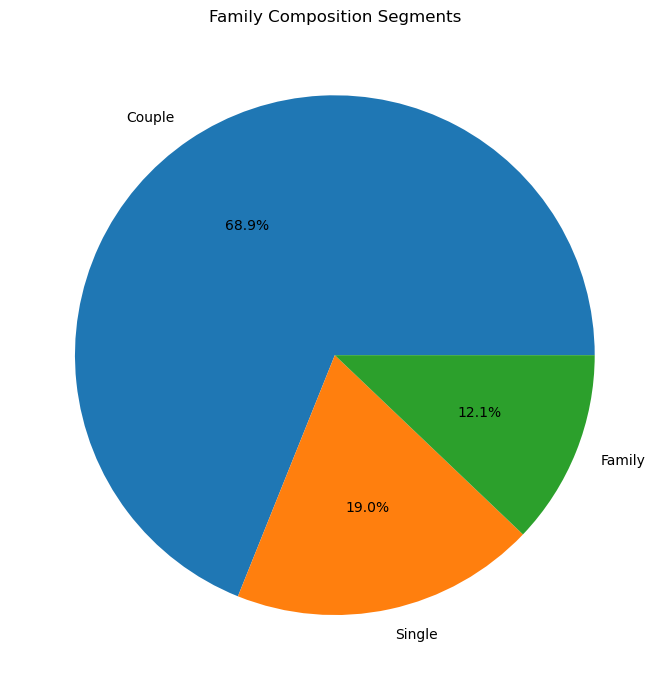

Total_Guests
Couple    82051
Single    22581
Family    14424
Name: count, dtype: int64

In [216]:
def family_Composition(df_family):
    df_family["Total_Guests"] = df_family["adults"] + df_family["children"] + df_family["babies"]
    family_count = pd.cut(df_family['Total_Guests'],bins=[0,1,2,4],labels=['Single','Couple','Family'])
    family_distrbution = family_count.value_counts()
    plt.figure(figsize=(10,7))
    plt.pie(family_distrbution.values, labels= family_distrbution.index,autopct='%1.1f%%')
    plt.title('Family Composition Segments')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    return family_distrbution

family_Composition(df_family)

### Market Segment distribution 

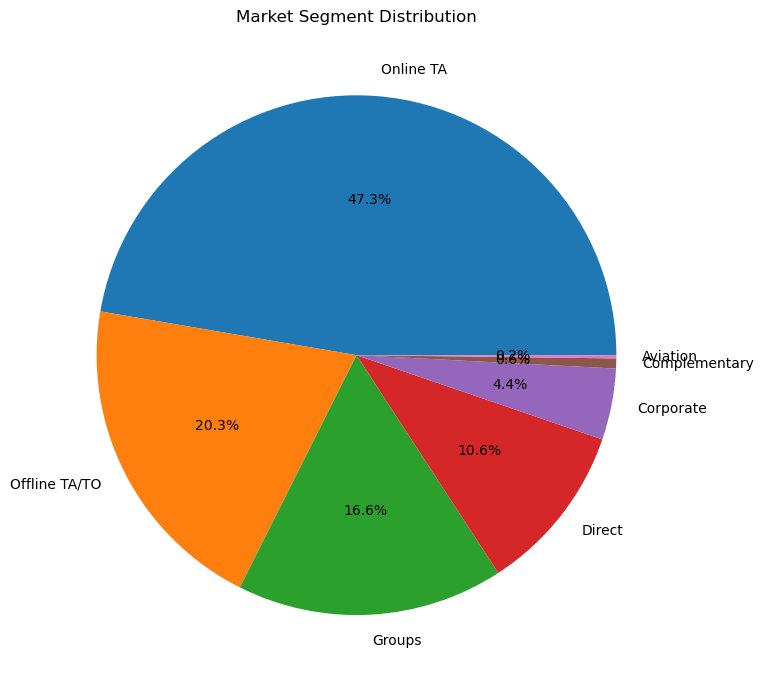

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64

In [217]:
def market_segment_analysis(df):
    market_segment_dist = df['market_segment'].value_counts()
    market_segment_dist = market_segment_dist.drop("Undefined")
    
    plt.figure(figsize=(10,7))
    plt.pie(market_segment_dist.values, labels= market_segment_dist.index,autopct='%1.1f%%',)
    plt.title('Market Segment Distribution')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    return market_segment_dist

market_segment_analysis(df_family)


C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\3674355011.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



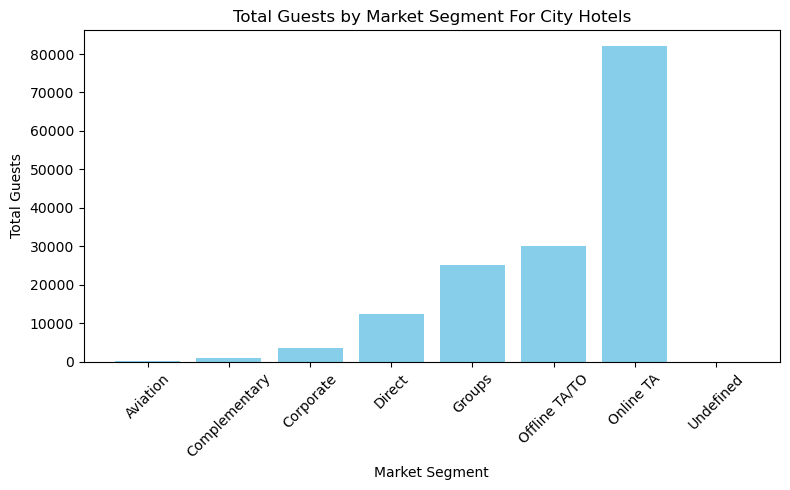

,market_segment,Total_Guests
0,Aviation,238.0
1,Complementary,851.0
2,Corporate,3689.0
3,Direct,12414.0
4,Groups,25110.0
5,Offline TA/TO,30117.0
6,Online TA,82054.0
7,Undefined,5.0


In [218]:
def city_travelers_market_analysis(df_family):
    city_hotel = df_family[df_family['hotel']=='City Hotel']
    group_market_dist = city_hotel.groupby('market_segment')['Total_Guests'].sum().reset_index()
    plt.figure(figsize=(8, 5))
    plt.bar(group_market_dist['market_segment'], group_market_dist['Total_Guests'], color='skyblue')
    plt.title('Total Guests by Market Segment For City Hotels')
    plt.xlabel('Market Segment')
    plt.ylabel('Total Guests')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return group_market_dist
city_travelers_market_analysis(df_family)



C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\1798386414.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



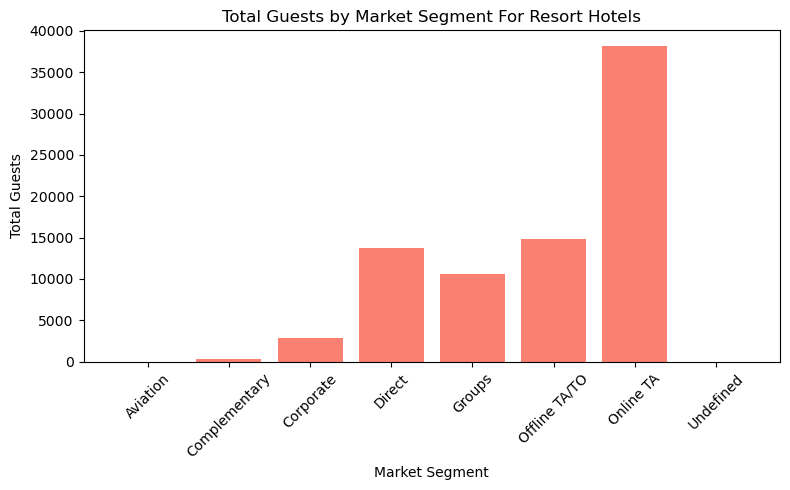

,market_segment,Total_Guests
0,Aviation,0.0
1,Complementary,336.0
2,Corporate,2925.0
3,Direct,13768.0
4,Groups,10559.0
5,Offline TA/TO,14774.0
6,Online TA,38148.0
7,Undefined,0.0


In [219]:
def resort_travelers_market_analysis(df_family):
    Resort_hotel = df_family[df_family['hotel']=='Resort Hotel']
    group_market_dist = Resort_hotel.groupby('market_segment')['Total_Guests'].sum().reset_index()

    plt.figure(figsize=(8, 5))
    plt.bar(group_market_dist['market_segment'], group_market_dist['Total_Guests'], color='Salmon')
    plt.title('Total Guests by Market Segment For Resort Hotels')
    plt.xlabel('Market Segment')
    plt.ylabel('Total Guests')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return group_market_dist
resort_travelers_market_analysis(df_family)

In [220]:
"""customer_types = df['customer_type'].unique()
for customer in customer_types:
    customer_data = df[df['customer_type'] == customer]

print(customer_types)    """

"customer_types = df['customer_type'].unique()\nfor customer in customer_types:\n    customer_data = df[df['customer_type'] == customer]\n\nprint(customer_types)    "

### Customer type room preferences

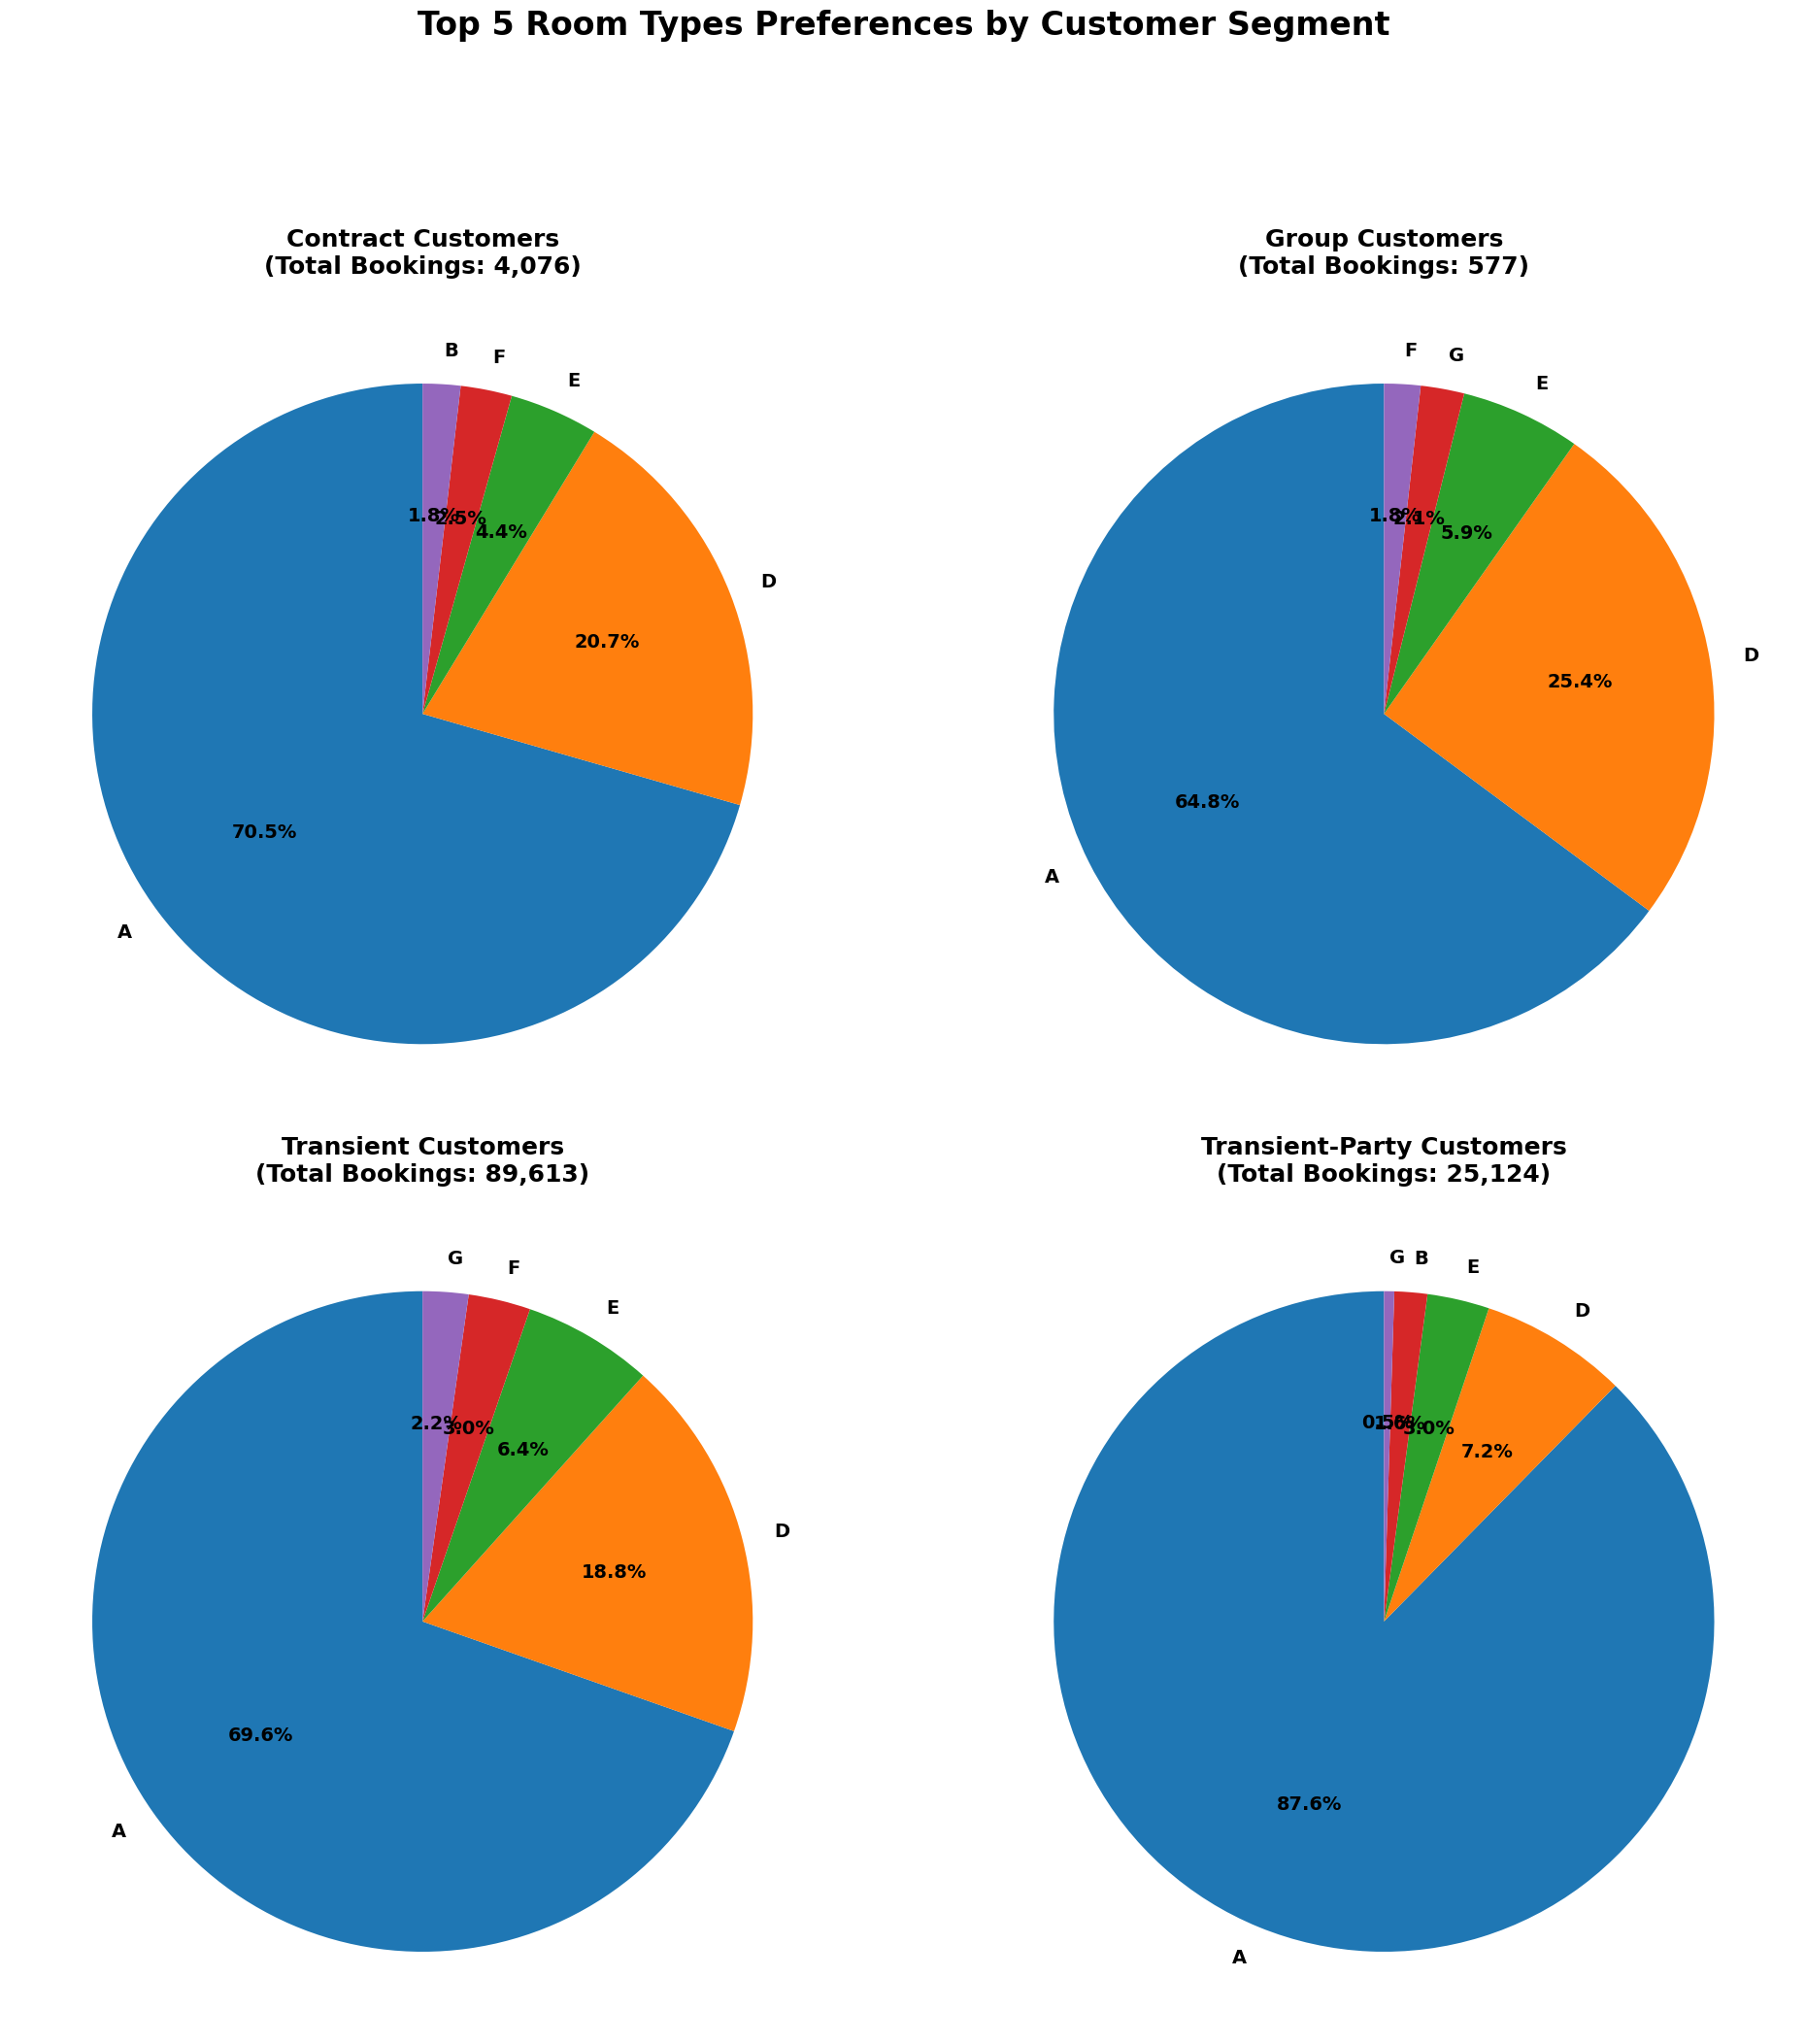

In [233]:
def customer_room_prefer(df):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    axes = axes.flatten()
    
    customer_types = df['customer_type'].unique()
    for i in range(len(customer_types)):
        customer = sorted(customer_types)[i]
        customer_data = df[df['customer_type'] == customer]
        room_preferences = customer_data['reserved_room_type'].value_counts().head(5)
        top_rooms = room_preferences
        total_bookings = len(customer_data)
        
        wedges, texts, autotexts = axes[i].pie(
            top_rooms.values,
            labels=top_rooms.index,
            autopct='%1.1f%%',
            startangle=90
        )
        
        plt.setp(autotexts, size=14, weight="bold")
        plt.setp(texts, size=14, weight="bold")
        
        axes[i].set_title(f'{customer} Customers\n(Total Bookings: {total_bookings:,})', 
                         pad=20, fontsize=18, fontweight='bold')
    
    # Adjust the layout first
    plt.tight_layout()
    
    # Add the main title with adjusted position
    fig.suptitle('Top 5 Room Types Preferences by Customer Segment',
                 fontsize=24, fontweight='bold', y=1.05)  # Increased y value to move title up
    
    # Add more space at the top for the main title
    plt.subplots_adjust(top=0.9)  # Adjust this value as needed
    
    plt.show()

customer_room_prefer(df)

# Stay Duration Analysis

In [172]:
# def calculate_total_stay_nights(df):
#     """Calculate total nights stayed per booking by adding a new column"""
#     df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
#     return df

# def analyze_stay_duration(df):
#     """Analyze various aspects of stay duration"""
#     stats = {
#         'Average total nights': df['total_nights'].mean(),
#         'Median total nights': df['total_nights'].median(),
#         'Most common duration': df['total_nights'].mode().iloc[0],
#         'Max stay duration': df['total_nights'].max(),
#         'Min stay duration': df['total_nights'].min()
#     }
#     print("\nStay Duration Statistics:")
#     for metric, value in stats.items():
#         print(f"{metric}: {value:.2f} days")

# def analyze_weekend_vs_weekday(df):
#     """Analyze weekend vs weekday stay patterns"""
    
#     # Calculate averages by hotel type
#     hotel_stays = df.groupby('hotel').agg({
#         'stays_in_weekend_nights': 'mean',
#         'stays_in_week_nights': 'mean',
#         'total_nights': 'mean'
#     }).round(2)
    
#     print("\nAverage Stays by Hotel Type:")
#     print(hotel_stays)
    
#     # Calculate weekend vs weekday ratio
#     df['weekend_ratio'] = df['stays_in_weekend_nights'] / df['total_nights']
#     avg_weekend_ratio = df['weekend_ratio'].mean()
    
#     print(f"\nAverage proportion of weekend nights for both hotels: {avg_weekend_ratio:.2%}")
    
# def analyze_seasonal_patterns(df):
#     """Analyze stay duration patterns by season/month for each hotel type"""
    
#     # Create month order for consistent sorting
#     month_order = ['January', 'February', 'March', 'April', 'May', 'June',
#                    'July', 'August', 'September', 'October', 'November', 'December']
    
#     # Calculate average stay duration by month and hotel type
#     monthly_stays = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].mean().unstack()
#     monthly_stays = monthly_stays.reindex(month_order)
    
#     # Calculate total nights stayed by month and hotel type
#     monthly_total_stays = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].sum().unstack()
#     monthly_total_stays = monthly_total_stays.reindex(month_order)
    
#     print("\nAverage Stay Duration by Month and Hotel Type (nights per booking):")
#     print(monthly_stays.round(2))
    
#     print("\nTotal Nights Stayed by Month and Hotel Type:")
#     print(monthly_total_stays.round(2))
    
#     # Calculate total nights for each hotel type
#     total_nights_by_hotel = df.groupby('hotel')['total_nights'].sum()
#     print("\nTotal Nights Stayed at Each Hotel:")
#     print(total_nights_by_hotel)
    
#     # Analyze patterns for City Hotel
#     city_peak_month = monthly_stays['City Hotel'].idxmax()
#     city_low_month = monthly_stays['City Hotel'].idxmin()
#     city_peak_value = monthly_stays['City Hotel'].max()
#     city_low_value = monthly_stays['City Hotel'].min()
    
#     # Analyze patterns for Resort Hotel
#     resort_peak_month = monthly_stays['Resort Hotel'].idxmax()
#     resort_low_month = monthly_stays['Resort Hotel'].idxmin()
#     resort_peak_value = monthly_stays['Resort Hotel'].max()
#     resort_low_value = monthly_stays['Resort Hotel'].min()
    
#     print("\nCity Hotel Seasonal Patterns:")
#     print(f"Peak month: {city_peak_month}")
#     print(f"- Average stay: {city_peak_value:.2f} nights per booking")
#     print(f"- Total nights: {monthly_total_stays.loc[city_peak_month, 'City Hotel']:.0f} nights")
#     print(f"Low month: {city_low_month}")
#     print(f"- Average stay: {city_low_value:.2f} nights per booking")
#     print(f"- Total nights: {monthly_total_stays.loc[city_low_month, 'City Hotel']:.0f} nights")
    
#     print("\nResort Hotel Seasonal Patterns:")
#     print(f"Peak month: {resort_peak_month}")
#     print(f"- Average stay: {resort_peak_value:.2f} nights per booking")
#     print(f"- Total nights: {monthly_total_stays.loc[resort_peak_month, 'Resort Hotel']:.0f} nights")
#     print(f"Low month: {resort_low_month}")
#     print(f"- Average stay: {resort_low_value:.2f} nights per booking")
#     print(f"- Total nights: {monthly_total_stays.loc[resort_low_month, 'Resort Hotel']:.0f} nights")
    
#     # Calculate and display year-round statistics
#     hotel_stats = df.groupby('hotel').agg({
#         'total_nights': ['mean', 'sum', 'count']
#     })
#     hotel_stats.columns = ['Average Stay', 'Total Nights', 'Number of Bookings']
    
#     print("\nYear-round Statistics by Hotel Type:")
#     print(hotel_stats.round(2))
    
#     # Calculate monthly share of total nights for each hotel
#     print("\nMonthly Share of Total Nights (%):")
#     monthly_share = monthly_total_stays.div(monthly_total_stays.sum()) * 100
#     print(monthly_share.round(2))

# # Calculate total nights for each booking
# df_copy = df.copy()
# df_copy = calculate_total_stay_nights(df_copy)
# # # Run all analyses
# print("=== Hotel Stay Duration Analysis ===")
# analyze_stay_duration(df_copy)
# analyze_weekend_vs_weekday(df_copy)
# analyze_seasonal_patterns(df_copy)
# # analyze_stay_distribution(df)

In [173]:
def calculate_total_stay_nights(df):
    """Calculate total nights stayed per booking by adding a new column"""
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    return df
df_copy = df.copy()
df_copy = calculate_total_stay_nights(df_copy)

C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\2198894593.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



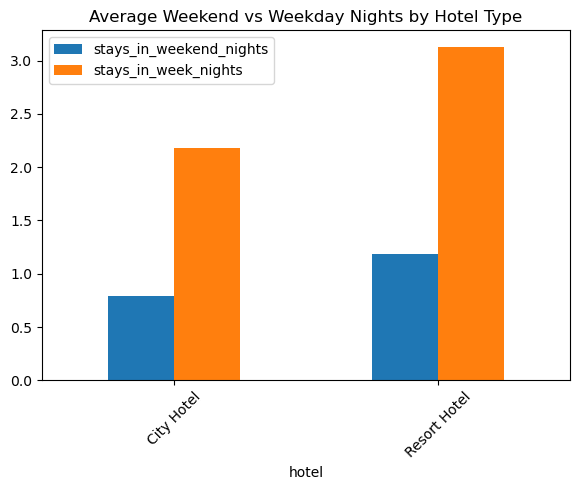

In [174]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
weekend_weekday = df.groupby('hotel')[['stays_in_weekend_nights', 'stays_in_week_nights']].mean()
weekend_weekday.plot(kind='bar', ax=plt.gca())
plt.title('Average Weekend vs Weekday Nights by Hotel Type')
plt.xticks(rotation=45)
plt.show()

## Distribution of stay durations by hotel type

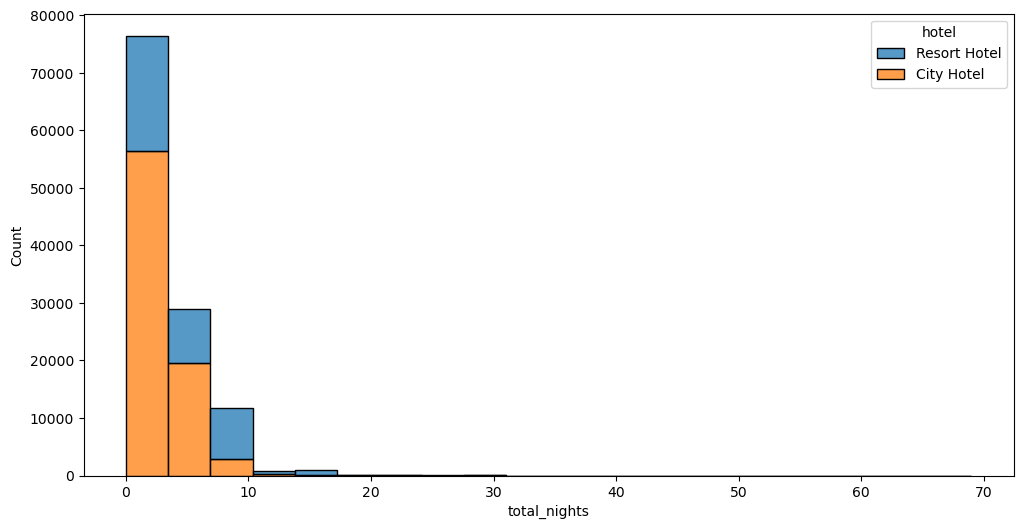

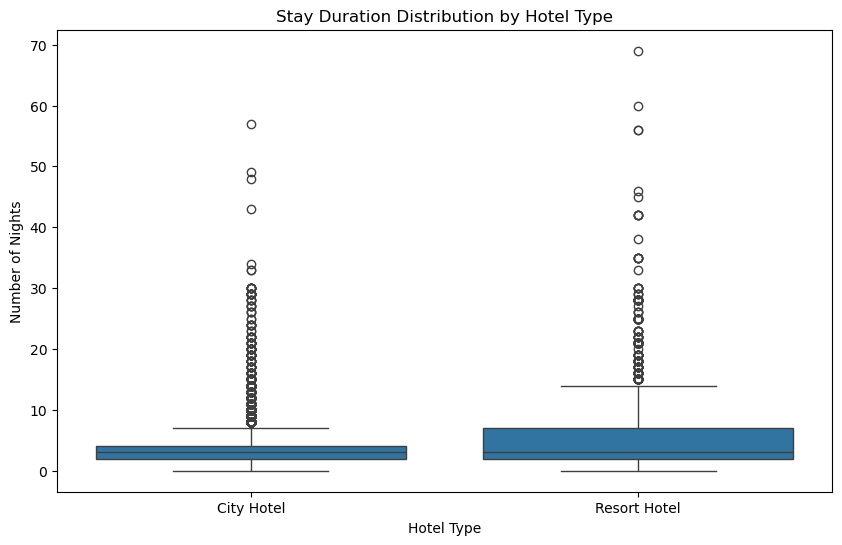

In [175]:
def plot_stay_duration_distribution(df):
    """Plot the distribution of stay durations by hotel type"""
    plt.figure(figsize=(12, 6))
    
    
    sns.histplot(data=df, 
                x='total_nights', 
                hue='hotel',
                multiple="stack", 
                bins=20,  # Light salmon for Resort, Light blue for City
                hue_order=['Resort Hotel', 'City Hotel']) 

def plot_stay_duration_boxplot(df):
    """Plot box plot of stay durations by hotel type"""
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='hotel', y='total_nights')
    plt.title('Stay Duration Distribution by Hotel Type')
    plt.xlabel('Hotel Type')
    plt.ylabel('Number of Nights')
    plt.show()
    
plot_stay_duration_distribution(df_copy)
plot_stay_duration_boxplot(df_copy)

### Analysis
#### Distribution Shape
The data reveals a highly right-skewed (positively skewed) distribution, with a strong concentration of short stays ranging from 0-3 nights. The distribution shows a long tail extending to approximately 20 nights, though there are very few stays that extend beyond this duration.
#### Pattern Recognition
Analysis shows a clear dominance of short-duration stays across the dataset. The data follows an exponential decay pattern in stay duration, with notable differences emerging between City and Resort hotels when examining the stacked color distributions.
#### Business Implications
The high turnover rate, evidenced by the predominance of short stays, suggests a need for highly efficient check-in and check-out processes. This pattern has significant implications for room cleaning and maintenance scheduling, while also presenting various opportunities for revenue optimization strategies.

## Average stay duration by month and hotel type

C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\1761364527.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x600 with 0 Axes>

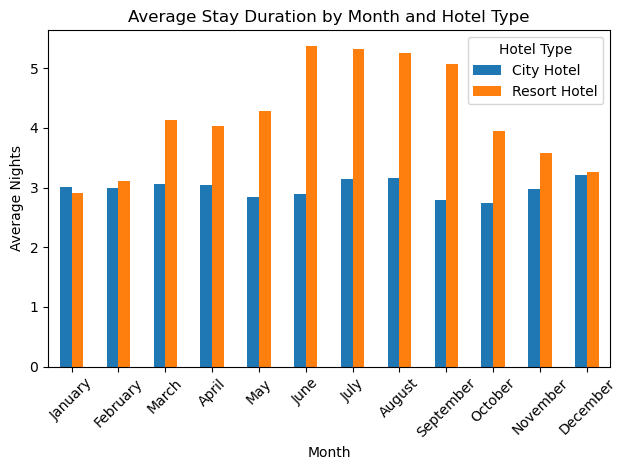

C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\1761364527.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1500x1000 with 0 Axes>

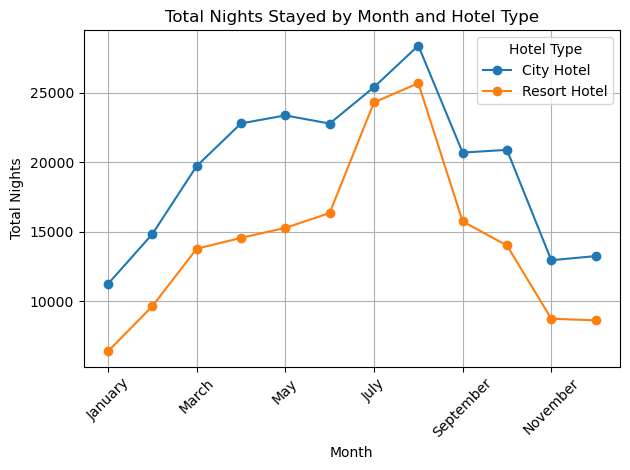

In [176]:
def plot_total_nights_by_month(df):
    plt.figure(figsize=(15, 10))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    total_nights_by_hotel = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].sum().unstack()
    total_nights_by_hotel = total_nights_by_hotel.reindex(month_order)
    total_nights_by_hotel.plot(kind='line', marker='o')
    plt.title('Total Nights Stayed by Month and Hotel Type')
    plt.xlabel('Month')
    plt.ylabel('Total Nights')
    plt.xticks(rotation=45)
    plt.legend(title='Hotel Type')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_monthly_average_stays(df):
    plt.figure(figsize=(12, 6))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_avg = df.groupby(['arrival_date_month', 'hotel'])['total_nights'].mean().unstack()
    monthly_avg = monthly_avg.reindex(month_order)
    monthly_avg.plot(kind='bar')
    plt.title('Average Stay Duration by Month and Hotel Type')
    plt.xlabel('Month')
    plt.ylabel('Average Nights')
    plt.xticks(rotation=45)
    plt.legend(title='Hotel Type')
    plt.tight_layout()
    plt.show()
    
    
plot_monthly_average_stays(df_copy)
plot_total_nights_by_month(df_copy)

### Seasonal Patterns

#### Peak Season (June-August)
- **City Hotels**
  * Highest total nights (~28,000 nights in August)
  * Consistent average stay duration (~3 nights)
  * Strong business performance despite shorter stays

- **Resort Hotels**
  * Peak total nights (~25,000 in July)
  * Longest average stays (~5.3 nights)
  * Clear summer vacation pattern

#### Off-Peak Season (November-January)
- **City Hotels**
  * Lowest total nights (~13,000)
  * Stable average duration (~3 nights)
  * Maintains business consistency

- **Resort Hotels**
  * Minimum total nights (~7,000)
  * Shorter average stays (~3 nights)
  * Converges with city hotel patterns

### Key Trends

#### Total Nights Pattern
1. **Seasonal Variation**
   * Both types show strong seasonality
   * City hotels consistently higher volume
   * Resort hotels show more dramatic fluctuation

2. **Volume Leadership**
   * City hotels maintain higher total nights year-round
   * Gap narrows significantly in summer months
   * Maximum difference in winter months

#### Stay Duration Insights
1. **City Hotels**
   * Remarkably stable duration (~2.8-3.2 nights)
   * Minimal seasonal impact on stay length
   * Suggests consistent business travel base

2. **Resort Hotels**
   * High seasonal variation in duration
   * Summer stays almost double winter stays
   * Clear leisure travel pattern

### Business Implications

#### Revenue Optimization
1. **City Hotels**
   * Focus on volume in peak seasons
   * Maintain consistent pricing strategy
   * Target business travelers year-round

2. **Resort Hotels**
   * Aggressive summer premium pricing
   * Winter package deals to increase stays
   * Focus on extending shoulder season stays



### Strategic Recommendations
1. Target shoulder seasons for growth
2. Develop season-specific pricing strategies
3. Optimize operational efficiency based on stay patterns
4. Create targeted marketing campaigns by season

## Comparison of weekend vs weekday stays

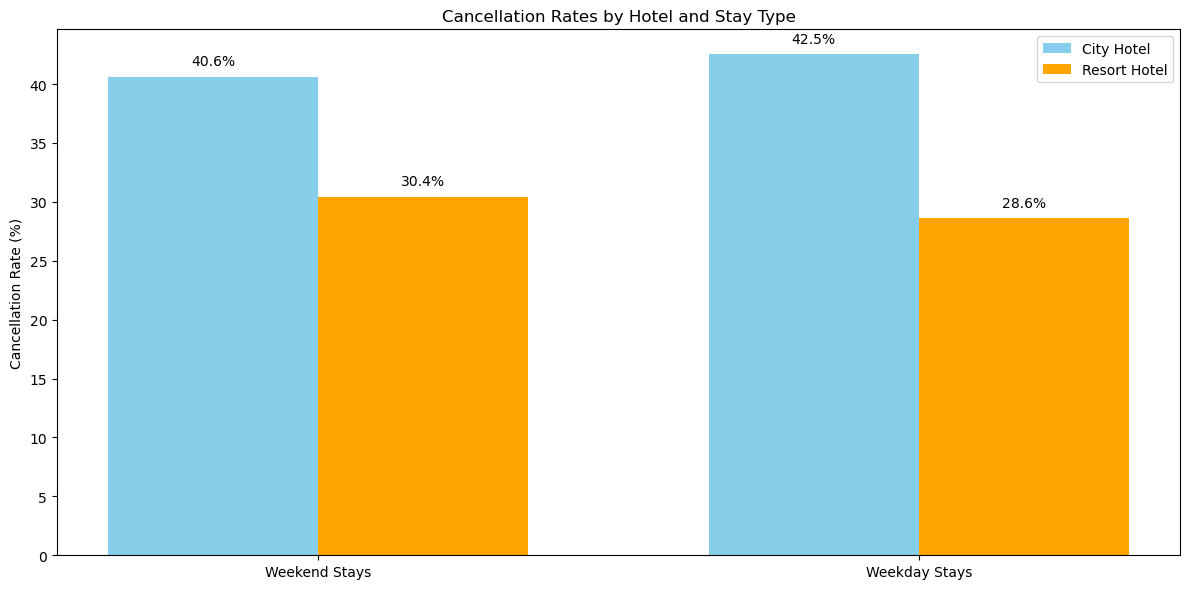

In [177]:
def plot_cancellation_rates_by_hotel(df):
    plt.figure(figsize=(12, 6))
    hotel_cancellation_rates = {}
    for hotel_type in df['hotel'].unique():
        hotel_data = df[df['hotel'] == hotel_type]
        weekend_stays = hotel_data[hotel_data['stays_in_weekend_nights'] > 0]
        weekday_stays = hotel_data[hotel_data['stays_in_week_nights'] > 0]
        hotel_cancellation_rates[hotel_type] = {
            'Weekend': (weekend_stays['is_canceled'].mean() * 100),
            'Weekday': (weekday_stays['is_canceled'].mean() * 100)
        }
    x = np.arange(2)
    width = 0.35
    
    plt.bar(x - width/2, 
            [hotel_cancellation_rates['City Hotel']['Weekend'],
             hotel_cancellation_rates['City Hotel']['Weekday']],
            width, 
            label='City Hotel',
            color='skyblue')
    plt.bar(x + width/2,
            [hotel_cancellation_rates['Resort Hotel']['Weekend'],
             hotel_cancellation_rates['Resort Hotel']['Weekday']],
            width,
            label='Resort Hotel',
            color='orange')
    
    plt.ylabel('Cancellation Rate (%)')
    plt.title('Cancellation Rates by Hotel and Stay Type')
    plt.xticks(x, ['Weekend Stays', 'Weekday Stays'])
    plt.legend()

    for i, hotel_type in enumerate(['City Hotel', 'Resort Hotel']):
        for j, stay_type in enumerate(['Weekend', 'Weekday']):
            value = hotel_cancellation_rates[hotel_type][stay_type]
            plt.text(j + (width if i else -width)/2, value + 1,
                    f'{value:.1f}%',
                    ha='center')
    
    plt.tight_layout()

    stats = {
        'Cancellation Rates': hotel_cancellation_rates,
        'Total Bookings': {
            'City Hotel': {
                'Weekend': len(df[(df['hotel'] == 'City Hotel') & 
                                (df['stays_in_weekend_nights'] > 0)]),
                'Weekday': len(df[(df['hotel'] == 'City Hotel') & 
                                 (df['stays_in_week_nights'] > 0)])
            },
            'Resort Hotel': {
                'Weekend': len(df[(df['hotel'] == 'Resort Hotel') & 
                                (df['stays_in_weekend_nights'] > 0)]),
                'Weekday': len(df[(df['hotel'] == 'Resort Hotel') & 
                                 (df['stays_in_week_nights'] > 0)])
            }
        }
    }
    
    return stats

stats = plot_cancellation_rates_by_hotel(df)
plt.show()

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_simple_cancellation_rates(df):

    weekend_stays = df[df['stays_in_weekend_nights'] > 0]
    weekday_stays = df[df['stays_in_week_nights'] > 0]
    
    cancellation_rates = {
        'Weekend': (weekend_stays['is_canceled'].mean() * 100),
        'Weekday': (weekday_stays['is_canceled'].mean() * 100)
    }
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(['Weekend Stays', 'Weekday Stays'],
                  [cancellation_rates['Weekend'], cancellation_rates['Weekday']],
                  color=['lightblue', 'orange'])
    
    plt.ylabel('Cancellation Rate (%)')
    plt.title('Cancellation Rates by Stay Type')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{height:.1f}%',
                ha='center', va='bottom')
    
    plt.tight_layout()
    
    return cancellation_rates

def analyze_cancellations_by_hotel_and_day(df):
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    stats = {}
    for hotel_type in df['hotel'].unique():
        hotel_data = df[df['hotel'] == hotel_type]
        
        cancelled = hotel_data[hotel_data['is_canceled'] == True]
        not_cancelled = hotel_data[hotel_data['is_canceled'] == False]
        
        stats[hotel_type] = {
            'Cancelled': {
                'Weekend': cancelled['stays_in_weekend_nights'].mean(),
                'Weekday': cancelled['stays_in_week_nights'].mean(),
                'Total': len(cancelled)
            },
            'Not Cancelled': {
                'Weekend': not_cancelled['stays_in_weekend_nights'].mean(),
                'Weekday': not_cancelled['stays_in_week_nights'].mean(),
                'Total': len(not_cancelled)
            }
        }
    
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 2)
    
    ax1 = fig.add_subplot(gs[0, 0])
    width = 0.35
    x = np.arange(2)
    
    ax1.bar(x - width/2, 
            [stats['City Hotel']['Cancelled']['Weekend'], 
             stats['City Hotel']['Cancelled']['Weekday']], 
            width, label='Cancelled', color='red', alpha=0.6)
    ax1.bar(x + width/2, 
            [stats['City Hotel']['Not Cancelled']['Weekend'], 
             stats['City Hotel']['Not Cancelled']['Weekday']], 
            width, label='Not Cancelled', color='green', alpha=0.6)
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(['Weekend Nights', 'Weekday Nights'])
    ax1.set_ylabel('Average Nights')
    ax1.set_title('City Hotel: Average Stay Duration')
    ax1.legend()
    
    ax2 = fig.add_subplot(gs[0, 1])
    
    ax2.bar(x - width/2, 
            [stats['Resort Hotel']['Cancelled']['Weekend'], 
             stats['Resort Hotel']['Cancelled']['Weekday']], 
            width, label='Cancelled', color='red', alpha=0.6)
    ax2.bar(x + width/2, 
            [stats['Resort Hotel']['Not Cancelled']['Weekend'], 
             stats['Resort Hotel']['Not Cancelled']['Weekday']], 
            width, label='Not Cancelled', color='green', alpha=0.6)
    
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Weekend Nights', 'Weekday Nights'])
    ax2.set_ylabel('Average Nights')
    ax2.set_title('Resort Hotel: Average Stay Duration')
    ax2.legend()
    
    ax3 = fig.add_subplot(gs[1, :])
    
    cancellation_rates = {}
    for hotel_type in ['City Hotel', 'Resort Hotel']:
        hotel_data = df[df['hotel'] == hotel_type]
        weekend_stays = hotel_data[hotel_data['stays_in_weekend_nights'] > 0]
        weekday_stays = hotel_data[hotel_data['stays_in_week_nights'] > 0]
        
        cancellation_rates[hotel_type] = {
            'Weekend': (weekend_stays['is_canceled'].mean() * 100),
            'Weekday': (weekday_stays['is_canceled'].mean() * 100)
        }
    
    x = np.arange(2)
    width = 0.35
    
    ax3.bar(x - width/2, 
            [cancellation_rates['City Hotel']['Weekend'], 
             cancellation_rates['City Hotel']['Weekday']], 
            width, label='City Hotel', color='skyblue')
    ax3.bar(x + width/2, 
            [cancellation_rates['Resort Hotel']['Weekend'], 
             cancellation_rates['Resort Hotel']['Weekday']], 
            width, label='Resort Hotel', color='orange')
    
    ax3.set_xticks(x)
    ax3.set_xticklabels(['Weekend Stays', 'Weekday Stays'])
    ax3.set_ylabel('Cancellation Rate (%)')
    ax3.set_title('Cancellation Rates by Hotel Type and Stay Type')
    ax3.legend()
    

    for i, hotel_type in enumerate(['City Hotel', 'Resort Hotel']):
        for j, stay_type in enumerate(['Weekend', 'Weekday']):
            value = cancellation_rates[hotel_type][stay_type]
            ax3.text(j + (width if i else -width)/2, value + 1, 
                    f'{value:.1f}%', ha='center')
    
    plt.tight_layout()

def plot_weekend_weekday_comparison(df):
    plt.figure(figsize=(10, 6))
    weekend_weekday = df.groupby('hotel').agg({
        'stays_in_weekend_nights': 'mean',
        'stays_in_week_nights': 'mean'
    })
    weekend_weekday.plot(kind='bar')
    plt.title('Average Weekend vs Weekday Nights by Hotel Type')
    plt.xlabel('Hotel Type')
    plt.ylabel('Average Nights')
    plt.legend(['Weekend Nights', 'Weekday Nights'])
    plt.tight_layout()
    plt.show()


C:\Users\asifm\AppData\Local\Temp\ipykernel_26024\1573856587.py:138: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

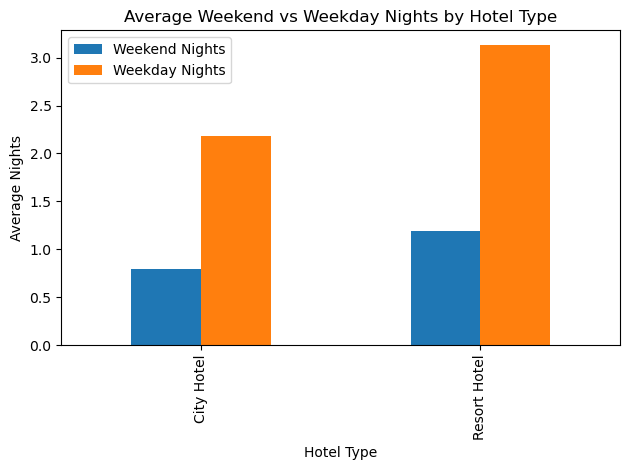

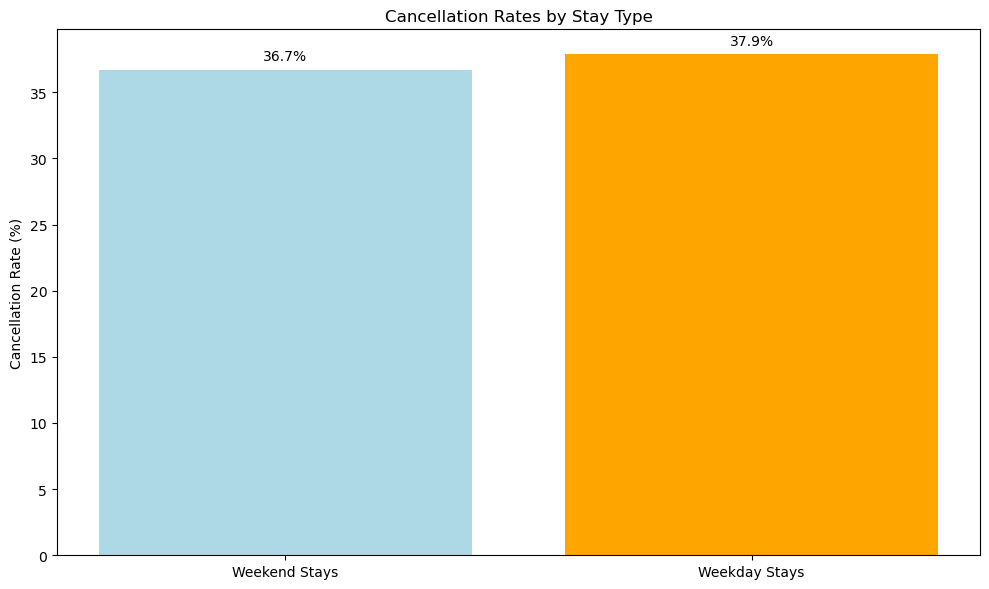

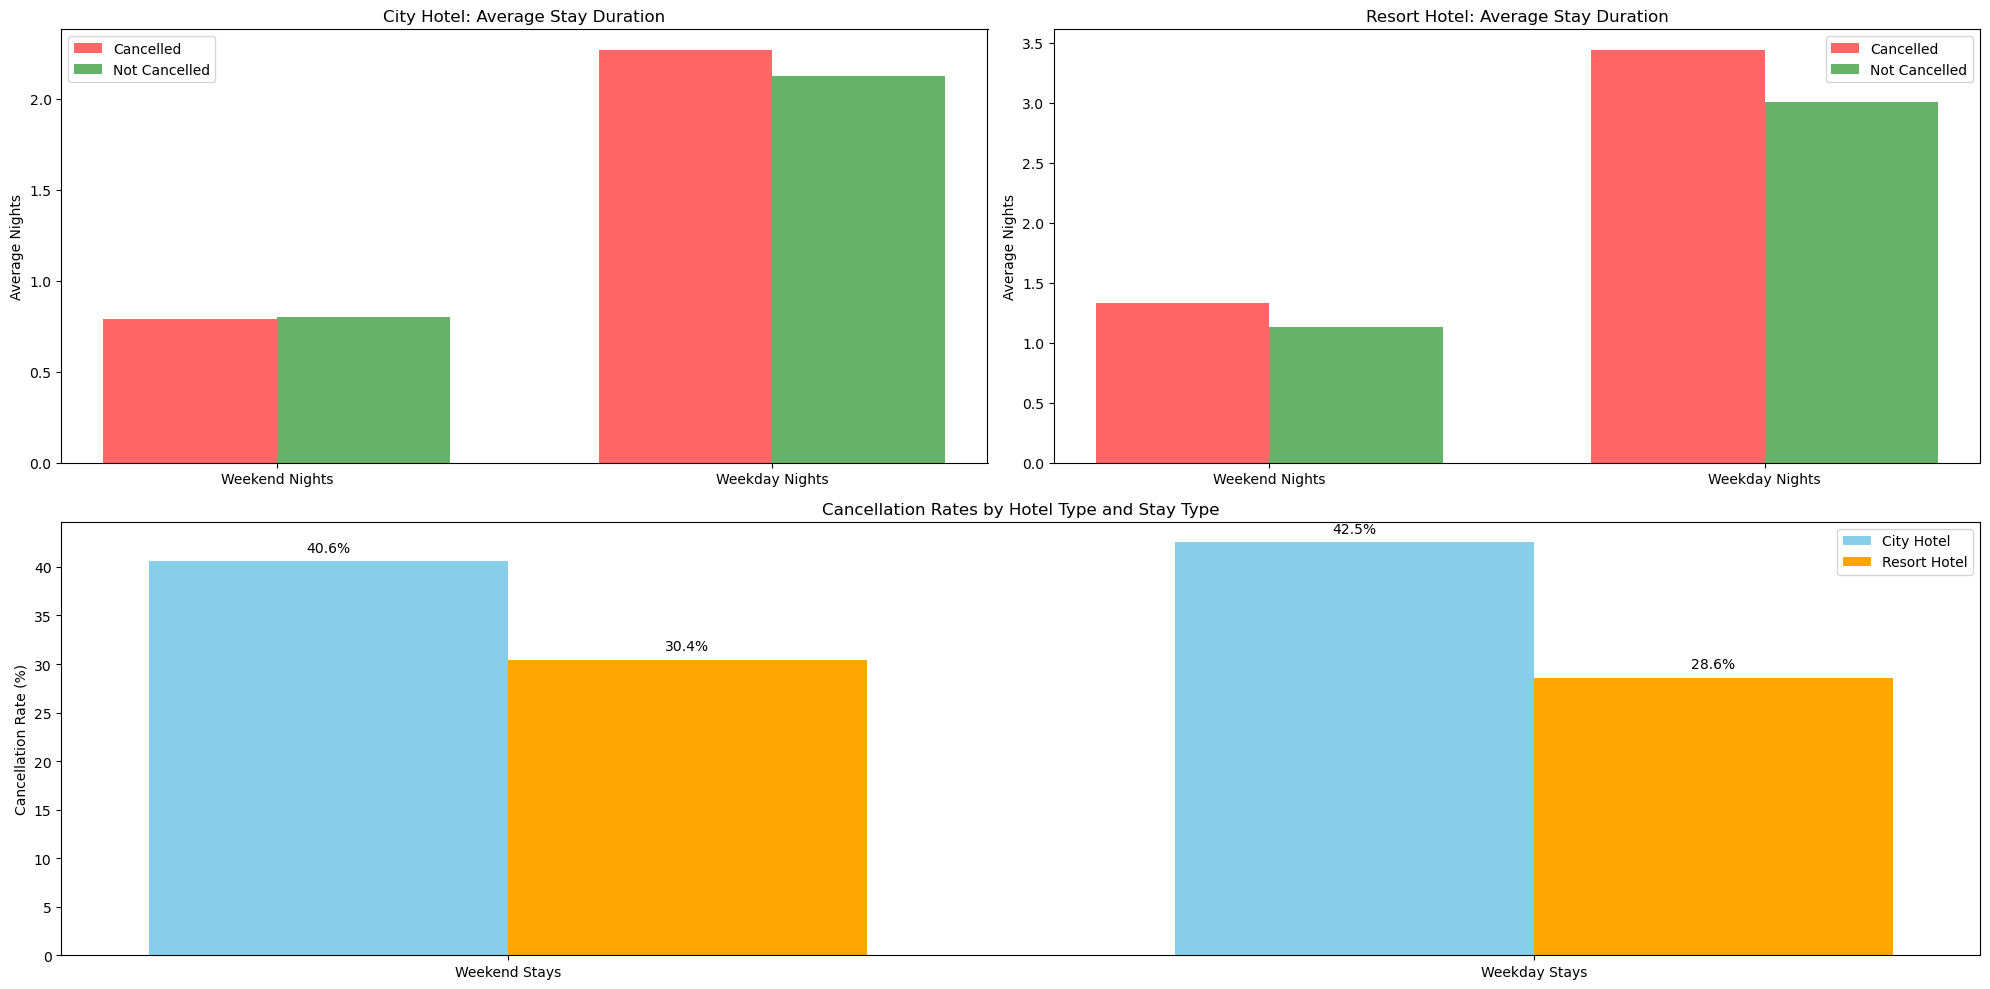

In [179]:
plot_weekend_weekday_comparison(df_copy)
plt.show()
plot_simple_cancellation_rates(df_copy)
plt.show()
analyze_cancellations_by_hotel_and_day(df_copy)
plt.show()

### Hotel stay analysis for weekdays vs weekends
#### City Hotels
- Lower average stay duration overall
- Weekend nights: ~0.8 nights average
- Weekday nights: ~2.2 nights average
- Clear preference for weekday stays (2.75x higher than weekends)

#### Resort Hotels
- Higher average stay duration compared to city hotels
- Weekend nights: ~1.2 nights average
- Weekday nights: ~3.1 nights average
- Strongest weekday preference (2.6x higher than weekends)

### Cancellation Analysis

#### Overall Patterns
- Weekday stays show slightly higher cancellation rates (37.9%) compared to weekend stays (36.7%)
- Minimal difference (~1.2%) between weekend and weekday cancellation rates
- Both types show significant cancellation rates >35%

#### Hotel-Specific Cancellation Patterns
1. **City Hotels**
   - Weekend cancellation rate: 40.6%
   - Weekday cancellation rate: 42.5%
   - Consistently higher cancellation rates than resort hotels
   - Higher volatility between cancelled and non-cancelled bookings

2. **Resort Hotels**
   - Weekend cancellation rate: 30.4%
   - Weekday cancellation rate: 28.6%
   - More stable cancellation pattern
   - Generally lower cancellation rates (~12% lower than city hotels)

### Key Business Insights

1. **Booking Stability**
   - Resort hotels demonstrate more stable booking patterns
   - City hotels face higher cancellation risk
   - Weekend bookings slightly more reliable overall

2. **Duration Strategy**
   - Both hotel types should focus on extending weekend stays
   - Resort hotels have better success with longer stays
   - Weekday stays dominate in terms of duration

3. **Risk Management**
   - City hotels should implement stronger cancellation policies
   - Focus on converting weekend bookings to longer stays
   - Consider different deposit requirements based on hotel type and stay duration

### Recommendations

1. **For City Hotels**
   - Implement stricter cancellation policies for weekday bookings
   - Develop weekend packages to increase duration
   - Consider loyalty programs to reduce cancellation rates

2. **For Resort Hotels**
   - Focus on maintaining lower cancellation rates
   - Develop extended stay promotions
   - Leverage successful weekday booking patterns

3. **General Strategies**
   - Differentiated pricing for weekend vs weekday stays
   - Length-of-stay incentives
   - targeted marketing based on stay patterns

## Stay duration by Market segment, Customer types and room Types

In [50]:
def plot_stay_duration_by_market_segment(df):
    """Plot stay duration by market segment"""
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='market_segment', y='total_nights', hue='hotel')
    plt.title('Stay Duration by Market Segment')
    plt.xlabel('Market Segment')
    plt.ylabel('Number of Nights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_stay_duration_by_customer_type(df):
    """Plot stay duration by customer type"""
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='customer_type', y='total_nights', hue='hotel')
    plt.title('Stay Duration by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Number of Nights')
    plt.tight_layout()
    plt.show()

def plot_stay_duration_by_room_type(df):
    """Plot stay duration by room type"""
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='assigned_room_type', y='total_nights', hue='hotel')
    plt.title('Stay Duration by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Number of Nights')
    plt.tight_layout()
    plt.show()

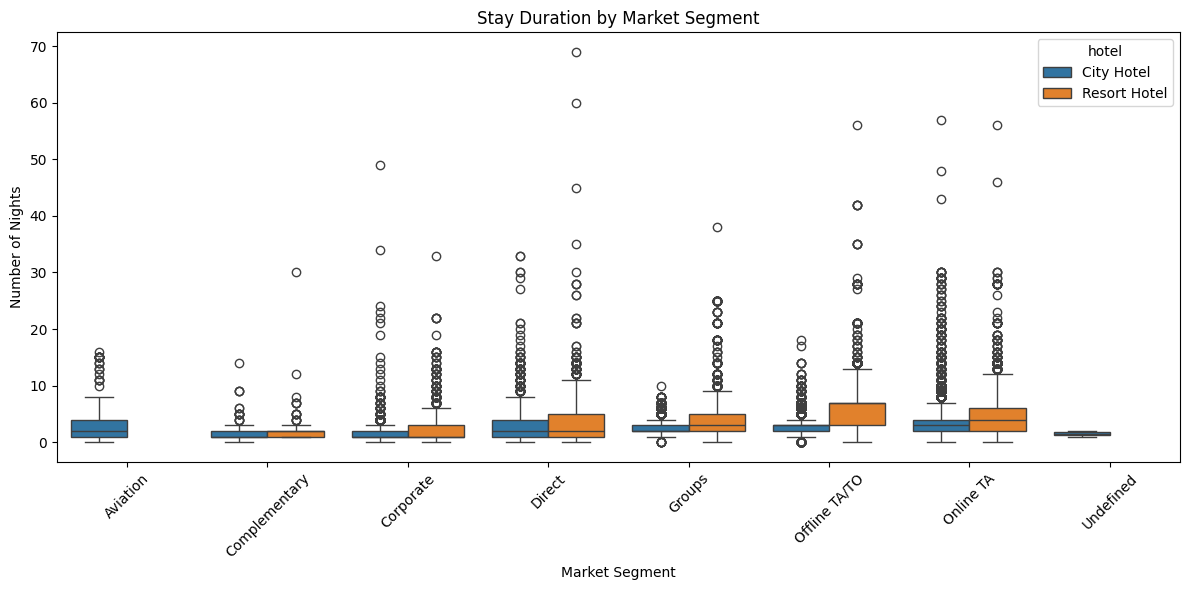

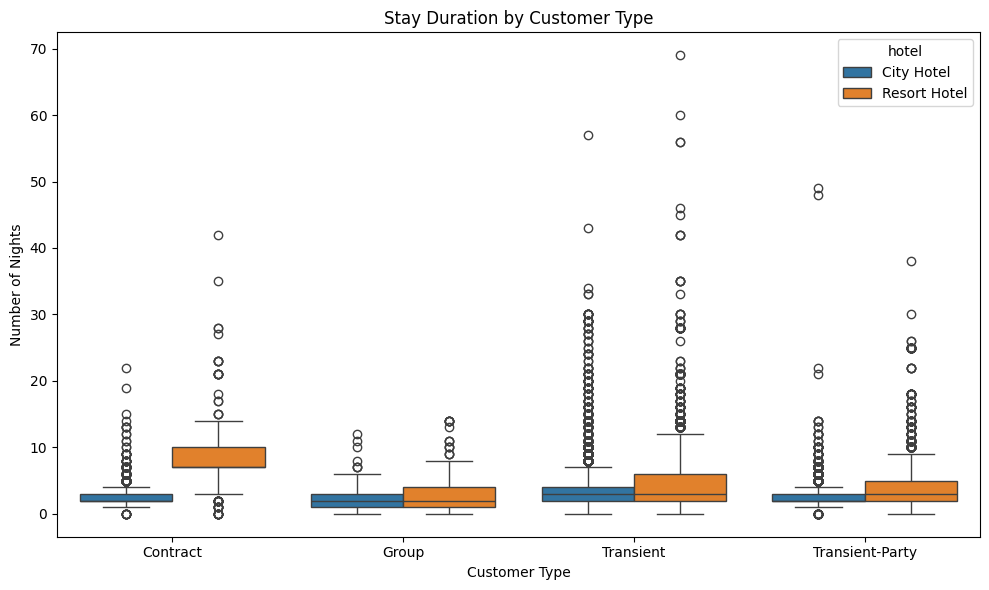

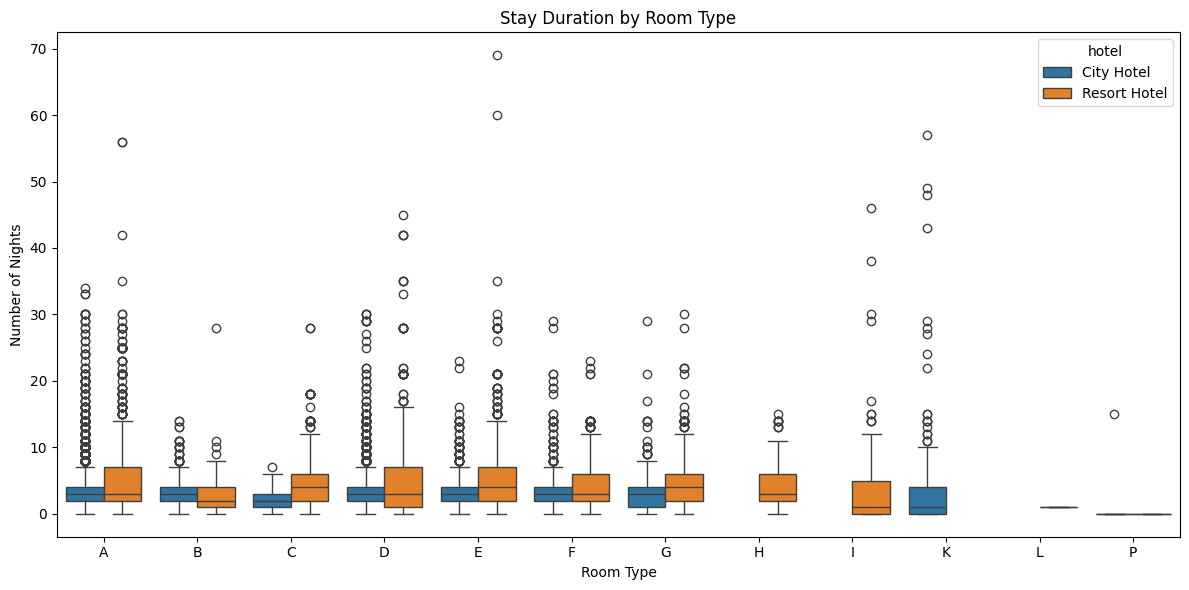

In [51]:
plot_stay_duration_by_market_segment(df_copy)
plot_stay_duration_by_customer_type(df_copy)
plot_stay_duration_by_room_type(df_copy)

### Market Segment Analysis

#### Online and Offline Travel Agencies (TA)
* Highest median stay duration for both hotel types
* Resort hotels show greater variance in stay length
* Online TA bookings typically longer than offline
* More outliers indicating extended stays (up to 60 nights)

#### Corporate and Direct Bookings
* More consistent stay durations
* City hotels show tighter distribution
* Direct bookings slightly longer than corporate
* Fewer extreme outliers

#### Aviation and Complementary
* Shortest average stays
* Limited variance in duration
* Minimal difference between hotel types
* Few outliers

### Customer Type Analysis

#### Contract Customers
* Resort hotels show significantly longer stays
* Highest median duration among all customer types
* Large variance in stay length
* Median stay ~8 nights for resort hotels

#### Transient Customers
* Most common customer type
* Similar patterns between city and resort hotels
* More outliers in resort hotels
* Median stay 2-3 nights

#### Group and Transient-Party
* Moderate stay durations
* Resort hotels show slightly longer stays
* More consistent patterns than contract customers
* Less variance in stay duration

### Room Type Patterns

#### Type A and D Rooms
* Most popular room types
* Highest number of bookings
* Greater variance in stay duration
* More outliers in both hotel types

#### Premium Rooms (B, C, F)
* Shorter average stays
* More consistent duration patterns
* Fewer extreme outliers
* Similar patterns across hotel types

#### Specialized Rooms (H, I, K)
* Limited availability in city hotels
* Resort-specific room types show unique patterns
* More variable stay durations
* Higher proportion of extended stays

### Business Implications

#### Marketing Strategy
1. **Target Segmentation**
   * Focus on Online TA for longer stays
   * Develop corporate packages for consistent occupancy
   * Special rates for contract customers in resort hotels

2. **Room Allocation**
   * Optimize Type A and D room inventory
   * Consider converting less popular room types
   * Balance premium room availability with demand

#### Operational Planning
1. **Resource Management**
   * Plan staffing based on customer type mix
   * Adjust housekeeping schedules for varying durations
   * Optimize room turnover processes

2. **Revenue Optimization**
   * Dynamic pricing by market segment
   * Length-of-stay incentives for preferred segments
   * Premium pricing for high-demand room types


## Lead time vs Stay Duration

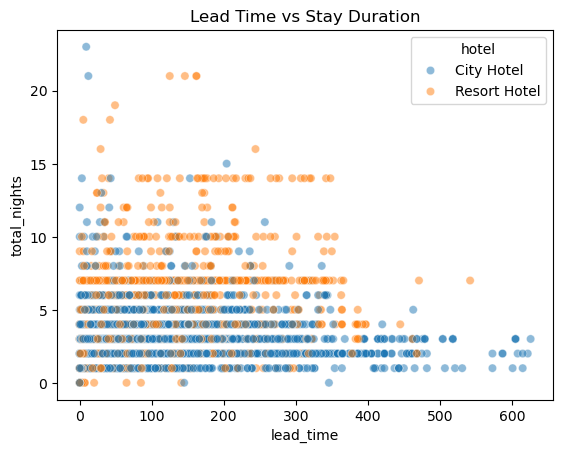

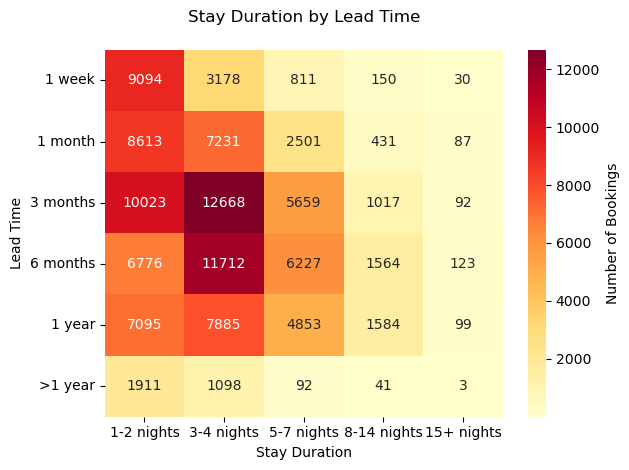

In [181]:
def analyze_lead_time_stay_patterns(df, figsize=(12, 8)):
    
    if 'total_nights' not in df.columns:
        df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    
    df['lead_time_cat'] = pd.cut(df['lead_time'], 
                                bins=[0, 7, 30, 90, 180, 365, float('inf')],
                                labels=['1 week', '1 month', '3 months', 
                                       '6 months', '1 year', '>1 year'])
    
    df['stay_duration_cat'] = pd.cut(df['total_nights'],
                                   bins=[0, 2, 4, 7, 14, float('inf')],
                                   labels=['1-2 nights', '3-4 nights', '5-7 nights',
                                          '8-14 nights', '15+ nights'])
    lead_time_corr = pd.crosstab(df['lead_time_cat'], df['stay_duration_cat'])
    sns.heatmap(lead_time_corr,
                annot=True,
                fmt='d',
                cmap='YlOrRd',
                cbar_kws={'label': 'Number of Bookings'})
    plt.title('Stay Duration by Lead Time', pad=20)
    plt.xlabel('Stay Duration')
    plt.ylabel('Lead Time')
    plt.tight_layout()
    plt.show()

def lead_time_vs_stay_duration(df):
    sns.scatterplot(data=df.sample(5000), x='lead_time', y='total_nights', 
                    hue='hotel', alpha=0.5)
    plt.title('Lead Time vs Stay Duration')
    plt.show()
lead_time_vs_stay_duration(df_copy)
analyze_lead_time_stay_patterns(df_copy)

### General Pattern


- Most bookings concentrate in the shorter stay duration range (1-5 nights)
- Lead times spread from immediate (0 days) to approximately 600 days in advance
- The pattern forms a dense cluster at the bottom of the plot, showing that shorter stays are most common regardless of lead time


### Hotel Type Differences


- City Hotels (blue dots) show more concentration in shorter stays
- Resort Hotels (orange dots) have more scattered points in longer stay durations
- Resort Hotels appear to have more longer-duration bookings (10+ nights)


### Lead Time Patterns


- Short stays (1-5 nights) occur across all lead times
- Longer stays (>10 nights) tend to have more varied lead times
- Very long stays (>20 nights) are rare and appear sporadically


### Notable Insights


- No strong linear relationship between lead time and stay duration
- Maximum stay duration appears to be around 30 nights
- Both hotel types show similar patterns in short-term bookings
- Resort Hotels have slightly more extended-stay bookings with longer lead times

## No. of Special Requests vs Stay Duration

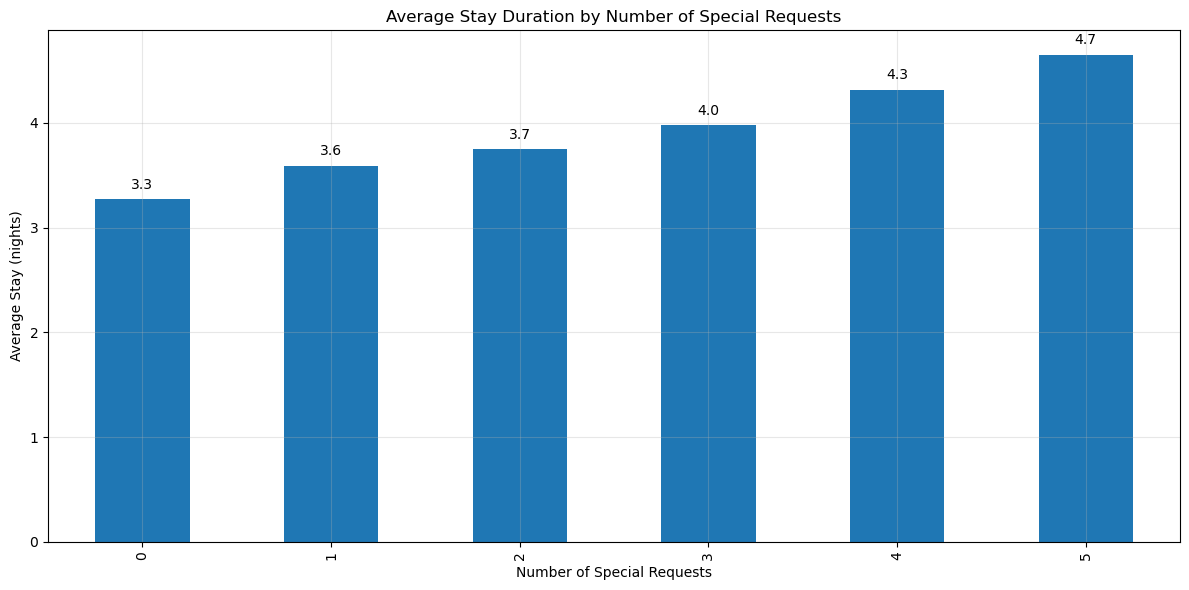

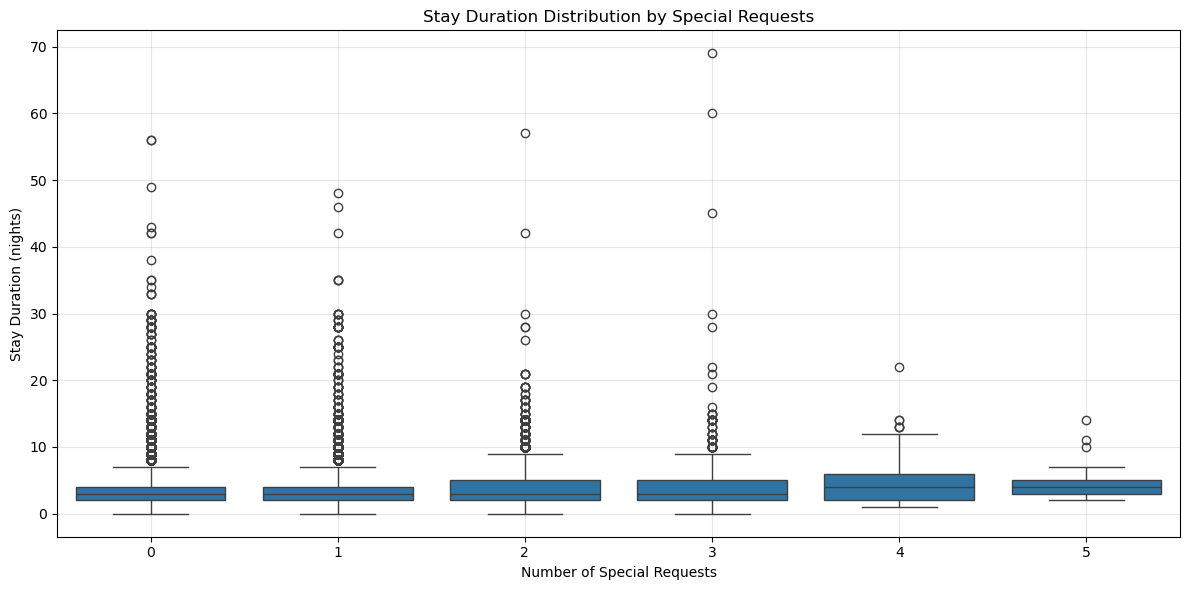

In [182]:
def analyze_stay_duration_requests(df):
    df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
    
    plt.figure(figsize=(12, 6))
    avg_stay_by_requests = df.groupby('total_of_special_requests')['total_stay'].mean()
    avg_stay_by_requests.plot(kind='bar')
    plt.title('Average Stay Duration by Number of Special Requests', fontsize=12)
    plt.xlabel('Number of Special Requests', fontsize=10)
    plt.ylabel('Average Stay (nights)', fontsize=10)
    plt.grid(True, alpha=0.3)
    for i, v in enumerate(avg_stay_by_requests):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='total_of_special_requests', y='total_stay')
    plt.title('Stay Duration Distribution by Special Requests', fontsize=12)
    plt.xlabel('Number of Special Requests', fontsize=10)
    plt.ylabel('Stay Duration (nights)', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    

analyze_stay_duration_requests(df_copy)

## Lead Time vs Stay Duration

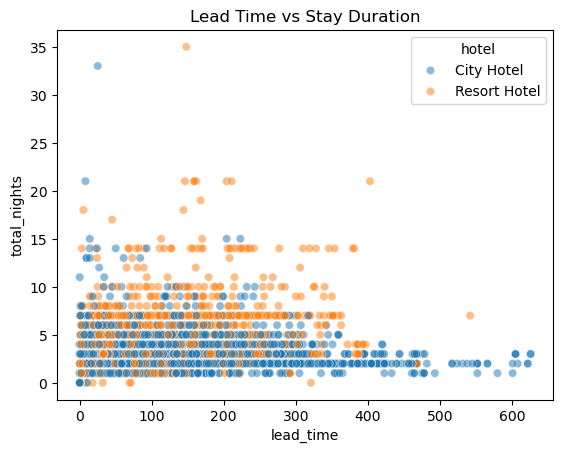

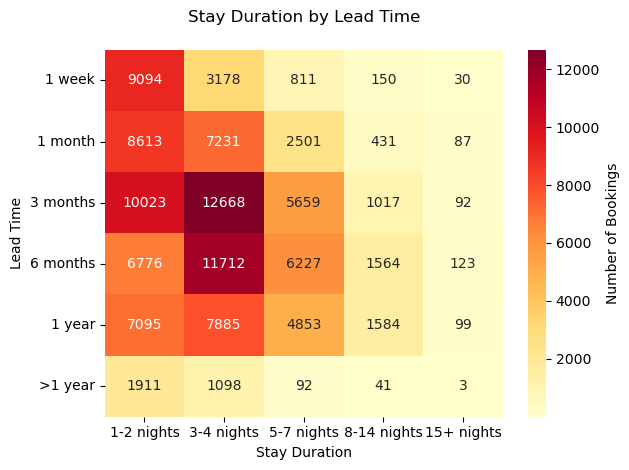

In [ ]:
def analyze_lead_time_stay_patterns(df, figsize=(12, 8)):
    df['lead_time_cat'] = pd.cut(df['lead_time'], 
                                bins=[0, 7, 30, 90, 180, 365, float('inf')],
                                labels=['1 week', '1 month', '3 months', 
                                       '6 months', '1 year', '>1 year'])
    
    df['stay_duration_cat'] = pd.cut(df['total_nights'],
                                   bins=[0, 2, 4, 7, 14, float('inf')],
                                   labels=['1-2 nights', '3-4 nights', '5-7 nights',
                                          '8-14 nights', '15+ nights'])
    
    
    lead_time_corr = pd.crosstab(df['lead_time_cat'], df['stay_duration_cat'])
    

    sns.heatmap(lead_time_corr,
                annot=True,
                fmt='d',
                cmap='YlOrRd',
                cbar_kws={'label': 'Number of Bookings'})
    plt.title('Stay Duration by Lead Time', pad=20)
    plt.xlabel('Stay Duration')
    plt.ylabel('Lead Time')
    plt.tight_layout()
    plt.show()

def lead_time_vs_stay_duration(df):
    sns.scatterplot(data=df.sample(5000), x='lead_time', y='total_nights', 
                    hue='hotel', alpha=0.5)
    plt.title('Lead Time vs Stay Duration')
    plt.show()
    
lead_time_vs_stay_duration(df_copy)
analyze_lead_time_stay_patterns(df_copy)

### General Pattern


- Most bookings concentrate in the shorter stay duration range (1-5 nights)
- Lead times spread from immediate (0 days) to approximately 600 days in advance
- The pattern forms a dense cluster at the bottom of the plot, showing that shorter stays are most common regardless of lead time


### Hotel Type Differences


- City Hotels (blue dots) show more concentration in shorter stays
- Resort Hotels (orange dots) have more scattered points in longer stay durations
- Resort Hotels appear to have more longer-duration bookings (10+ nights)


### Lead Time Patterns


- Short stays (1-5 nights) occur across all lead times
- Longer stays (>10 nights) tend to have more varied lead times
- Very long stays (>20 nights) are rare and appear sporadically


### Notable Insights


- No strong linear relationship between lead time and stay duration
- Maximum stay duration appears to be around 30 nights
- Both hotel types show similar patterns in short-term bookings
- Resort Hotels have slightly more extended-stay bookings with longer lead times

# Cancelation Analyzis

### 1) Cancelation by Hotel type

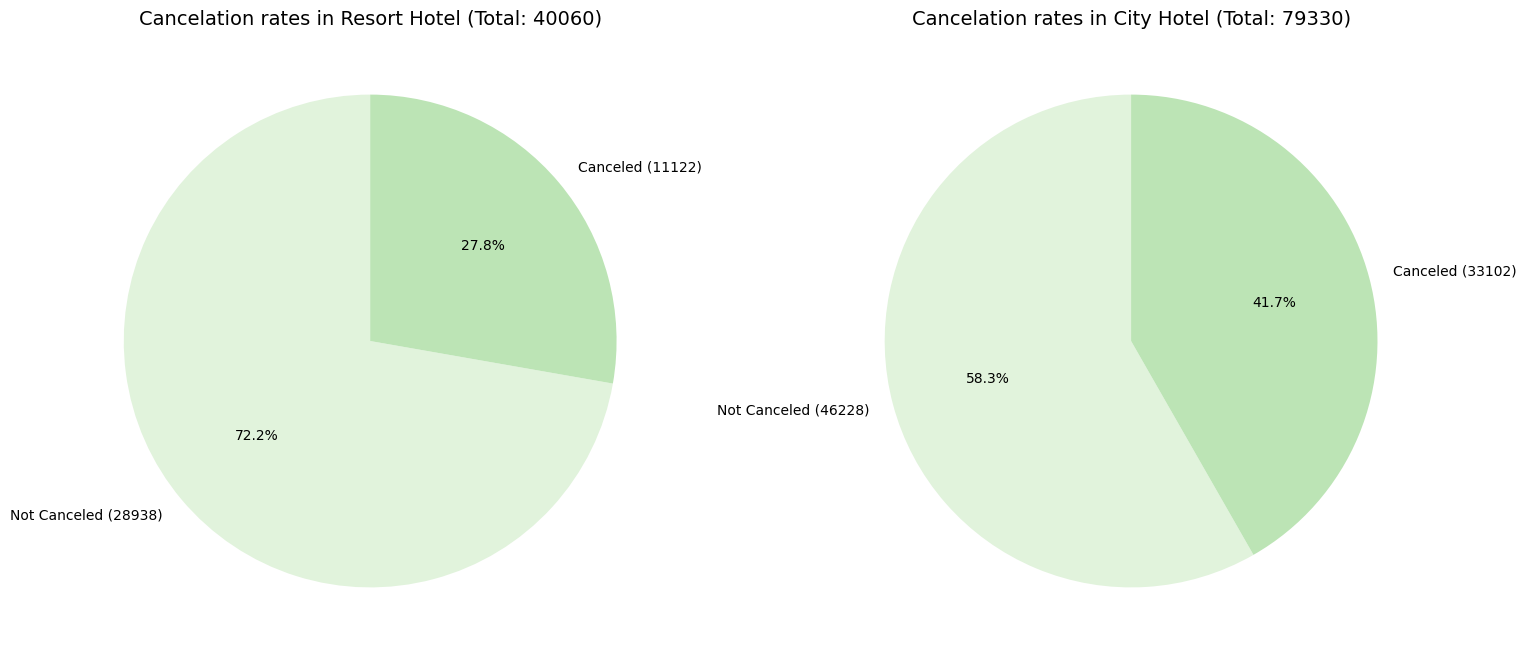

In [ ]:
hotel_counts = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)
hotel_totals = hotel_counts.sum(axis=1)

# -------------Cancelation rates in Resort Hotel-------------
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
resort_data = hotel_counts.loc['Resort Hotel']
axes[0].pie(
    resort_data, 
    labels=[f"Not Canceled ({resort_data[0]})", f"Canceled ({resort_data[1]})"], 
    autopct=lambda p: f"{p:.1f}%",
    startangle=90, 
    colors=sns.color_palette("Greens"))
axes[0].set_title(f"Cancelation rates in Resort Hotel (Total: {hotel_totals['Resort Hotel']})", fontsize=14)
# -------------Cancelation rates in City Hotel-------------
city_data = hotel_counts.loc['City Hotel']
axes[1].pie(
    city_data, 
    labels=[f"Not Canceled ({city_data[0]})", f"Canceled ({city_data[1]})"], 
    autopct=lambda p: f"{p:.1f}%",
    startangle=90, 
    colors=sns.color_palette("Greens"))
axes[1].set_title(f"Cancelation rates in City Hotel (Total: {hotel_totals['City Hotel']})", fontsize=14)

plt.show()

Resort Hotels show a lower cancellation rate of 27.8%, with most bookings (72.2%) being honored, indicating more stable reservation patterns, likely due to leisure-focused travel. In contrast, City Hotels have a significantly higher cancellation rate of 41.7%, suggesting greater booking volatility, possibly due to business travel or short-term stays. This highlights differing customer behaviors and the need for tailored booking strategies for each hotel type.

### 2) Cancelation by Month

<Figure size 1400x800 with 0 Axes>

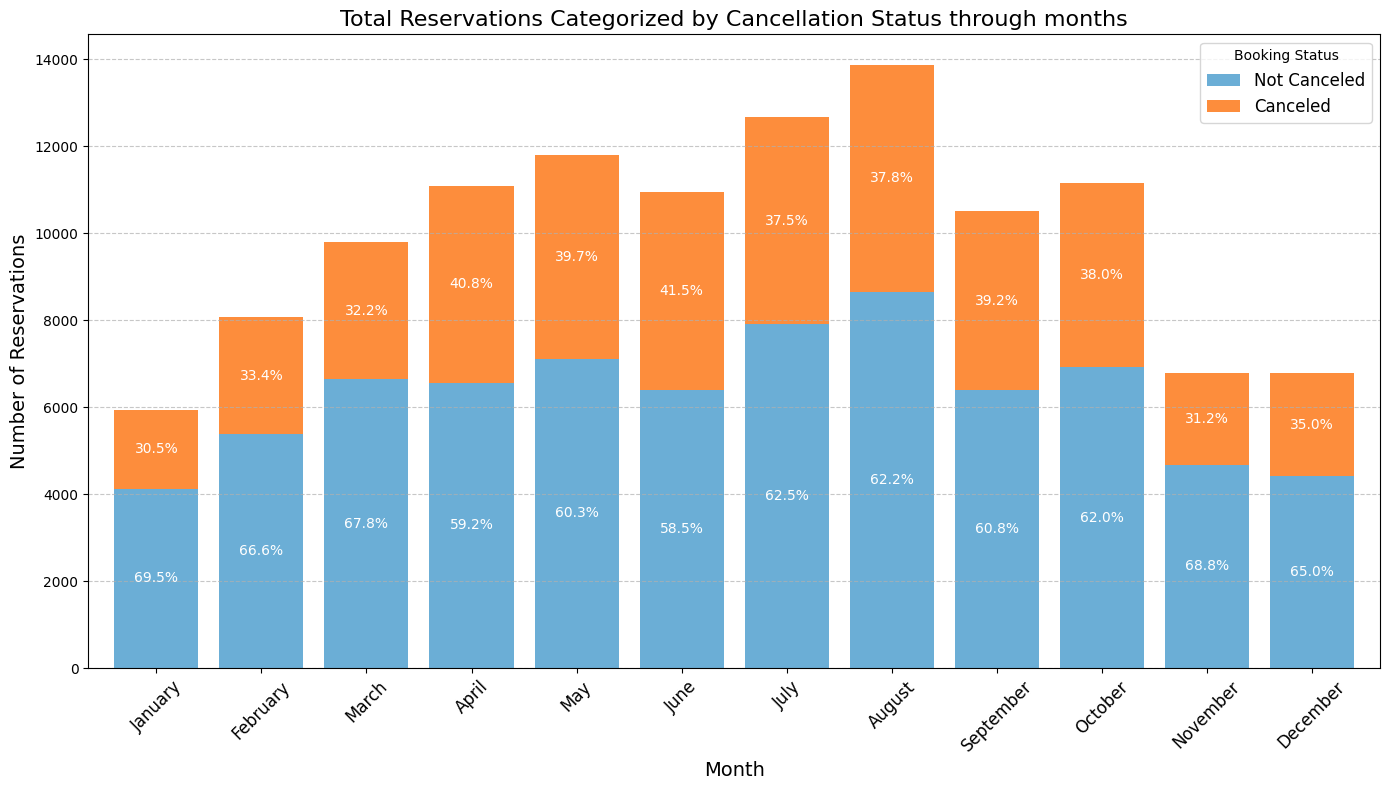

In [ ]:
#  months
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_data = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0).reindex(months_order)
monthly_percent = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
monthly_data.plot(kind='bar', stacked=True, width=0.8, color=['#6baed6', '#fd8d3c'], figsize=(14, 8))
plt.title("Total Reservations Categorized by Cancellation Status through months", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Reservations", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)
for i, (index, row) in enumerate(monthly_percent.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, 
            monthly_data.iloc[i].cumsum()[j] - (monthly_data.iloc[i, j] / 2), 
            f"{value:.1f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

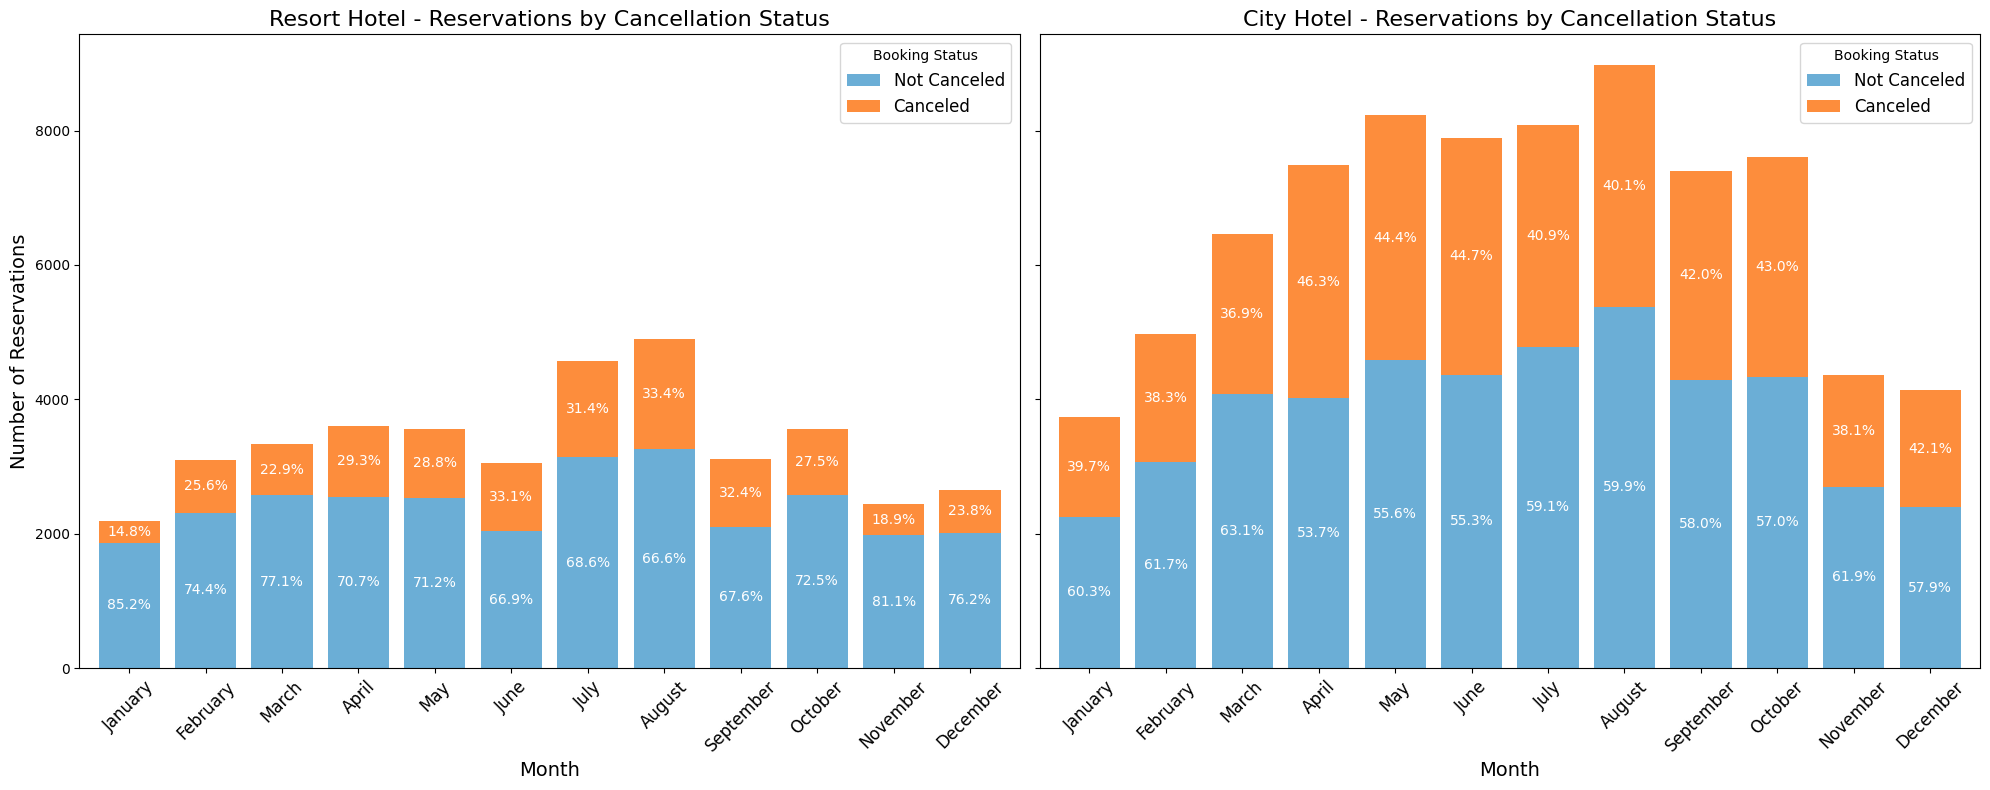

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
hotel_types = df['hotel'].unique()

for ax, hotel in zip(axes, hotel_types):
    hotel_data = df[df['hotel'] == hotel]
    monthly_data = hotel_data.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0).reindex(months_order)
    monthly_percent = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100
    monthly_data.plot(kind='bar', stacked=True, width=0.8, color=['#6baed6', '#fd8d3c'], ax=ax)
    ax.set_title(f"{hotel} - Reservations by Cancellation Status", fontsize=16)
    ax.set_xlabel("Month", fontsize=14)
    ax.set_ylabel("Number of Reservations", fontsize=14)
    ax.set_xticks(range(len(months_order)))
    ax.set_xticklabels(months_order, rotation=45, fontsize=12)
    ax.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)
    for i, (index, row) in enumerate(monthly_percent.iterrows()):
        for j, value in enumerate(row):
            ax.text(i, 
            monthly_data.iloc[i].cumsum()[j] - (monthly_data.iloc[i, j] / 2), 
            f"{value:.1f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=10)

plt.tight_layout()
plt.show()



The side-by-side stacked bar charts compare cancellation trends for Resort Hotels and City Hotels across the year. **Resort Hotels** exhibit lower cancellation rates, consistently below 35% for most months, with higher stability during off-peak months like January and November (cancellation rates around 15-20%). In contrast, **City Hotels** show much higher cancellation rates, peaking above 45% during the spring and summer months, reflecting more volatile booking patterns. These trends highlight the differences in customer behavior between leisure-oriented resorts and business-focused city accommodations.

### 3) Cancelation by Lead Time

<Figure size 1200x600 with 0 Axes>

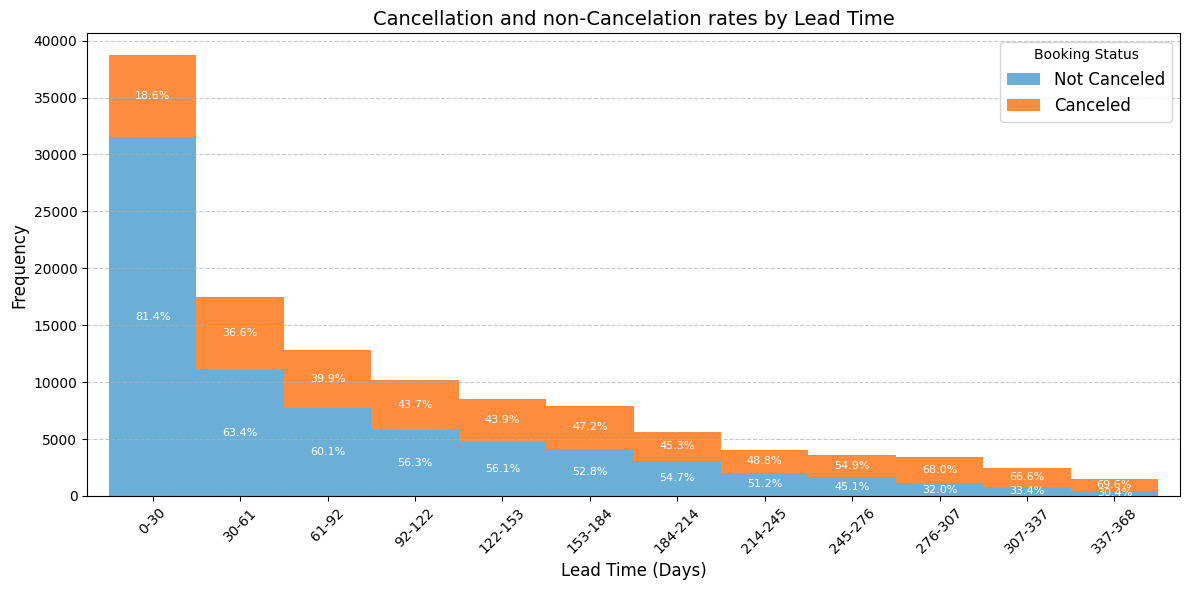

In [ ]:
bins = 24 # I have used this bining because it's the closest to 30 days = month
bin_edges = np.histogram_bin_edges(df['lead_time'], bins=bins)

hist_data = pd.DataFrame({
    'Not Canceled': np.histogram(df[df['is_canceled'] == 0]['lead_time'], bins=bin_edges)[0],
    'Canceled': np.histogram(df[df['is_canceled'] == 1]['lead_time'], bins=bin_edges)[0]
}, index=pd.IntervalIndex.from_breaks(bin_edges, closed='left'))
hist_percent = hist_data.div(hist_data.sum(axis=1), axis=0) * 100
valid_bins = hist_data.sum(axis=1) >= 1000
filtered_hist_data = hist_data[valid_bins]
filtered_hist_percent = hist_percent[valid_bins]

plt.figure(figsize=(12, 6))
ax = filtered_hist_data.plot(kind='bar', stacked=True, color=['#6baed6', '#fd8d3c'], figsize=(12, 6), width=1)
for i, (index, row) in enumerate(filtered_hist_percent.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, 
            filtered_hist_data.iloc[i].cumsum()[j] - (filtered_hist_data.iloc[i, j] / 2), 
            f"{value:.1f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=8)

plt.title("Cancellation and non-Cancelation rates by Lead Time", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)
plt.xticks(ticks=range(len(filtered_hist_data)), 
    labels=[f"{int(interval.left)}-{int(interval.right)}" for interval in filtered_hist_data.index], 
    rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

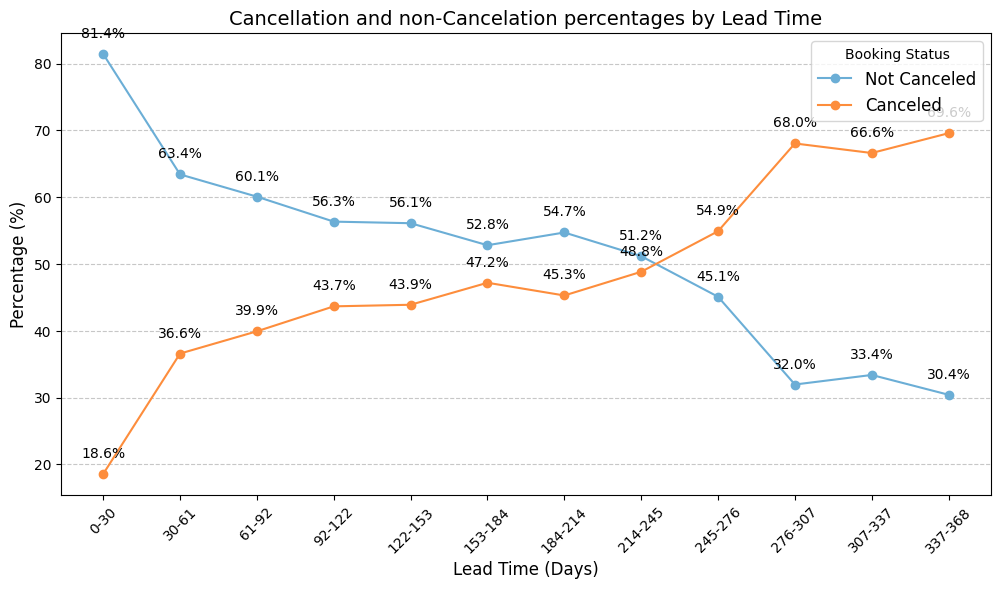

In [ ]:
bins = 24
bin_edges = np.histogram_bin_edges(df['lead_time'], bins=bins)
hist_data = pd.DataFrame({
    'Not Canceled': np.histogram(df[df['is_canceled'] == 0]['lead_time'], bins=bin_edges)[0],
    'Canceled': np.histogram(df[df['is_canceled'] == 1]['lead_time'], bins=bin_edges)[0]
}, index=pd.IntervalIndex.from_breaks(bin_edges, closed='left'))
hist_percent = hist_data.div(hist_data.sum(axis=1), axis=0) * 100
valid_bins = hist_data.sum(axis=1) >= 1000
filtered_hist_percent = hist_percent[valid_bins]
rounded_bins = [f"{int(bin.left)}-{int(bin.right)}" for bin in filtered_hist_percent.index]


plt.figure(figsize=(12, 6))
plt.plot(rounded_bins, filtered_hist_percent['Not Canceled'], label="Not Canceled", color='#6baed6', marker='o')
plt.plot(rounded_bins, filtered_hist_percent['Canceled'], label="Canceled", color='#fd8d3c', marker='o')
for i, (index, row) in enumerate(filtered_hist_percent.iterrows()):
    plt.text(i, row['Not Canceled'] + 2, f"{row['Not Canceled']:.1f}%", ha="center", va="bottom", fontsize=10)
    plt.text(i, row['Canceled'] + 2, f"{row['Canceled']:.1f}%", ha="center", va="bottom", fontsize=10)

plt.title("Cancellation and non-Cancelation percentages by Lead Time", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Booking Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The graph illustrates cancellation and non-cancellation percentages based on lead time. For shorter lead times (0-30 days), the majority of bookings (81.4%) are not canceled, but cancellation rates gradually increase with longer lead times. At lead times exceeding 214 days, cancellations consistently surpass non-cancellations, peaking at 69% for the 337-368 days range. This trend suggests that bookings made far in advance are more prone to cancellations, likely due to changing plans or uncertainties over time.

### 4) Cancelation by Market Segment

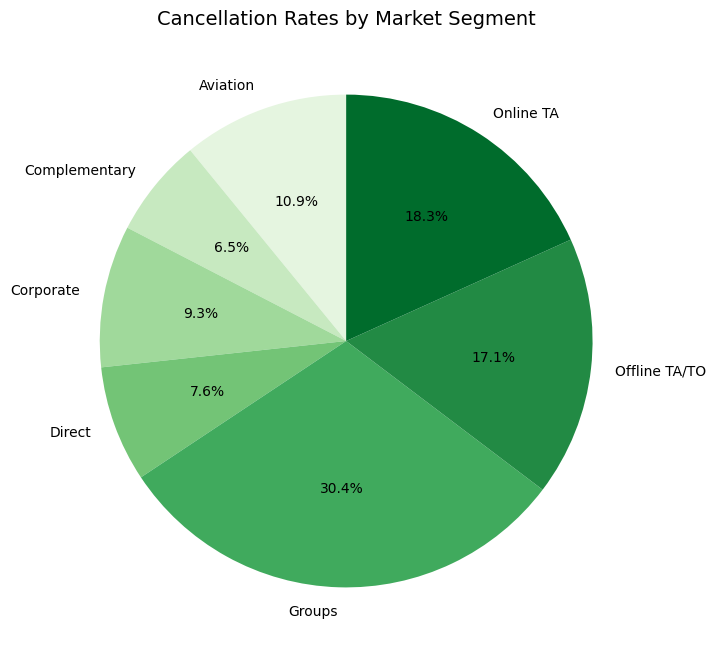

In [ ]:
market_segment_cancellation_rates = df.groupby('market_segment')['is_canceled'].mean() * 100
market_segment_cancellation_rates = market_segment_cancellation_rates[market_segment_cancellation_rates.index != 'Undefined']

plt.figure(figsize=(8, 8))
plt.pie(market_segment_cancellation_rates, 
        labels=market_segment_cancellation_rates.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("Greens", n_colors=len(market_segment_cancellation_rates)))
plt.title("Cancellation Rates by Market Segment", fontsize=14)
plt.show()

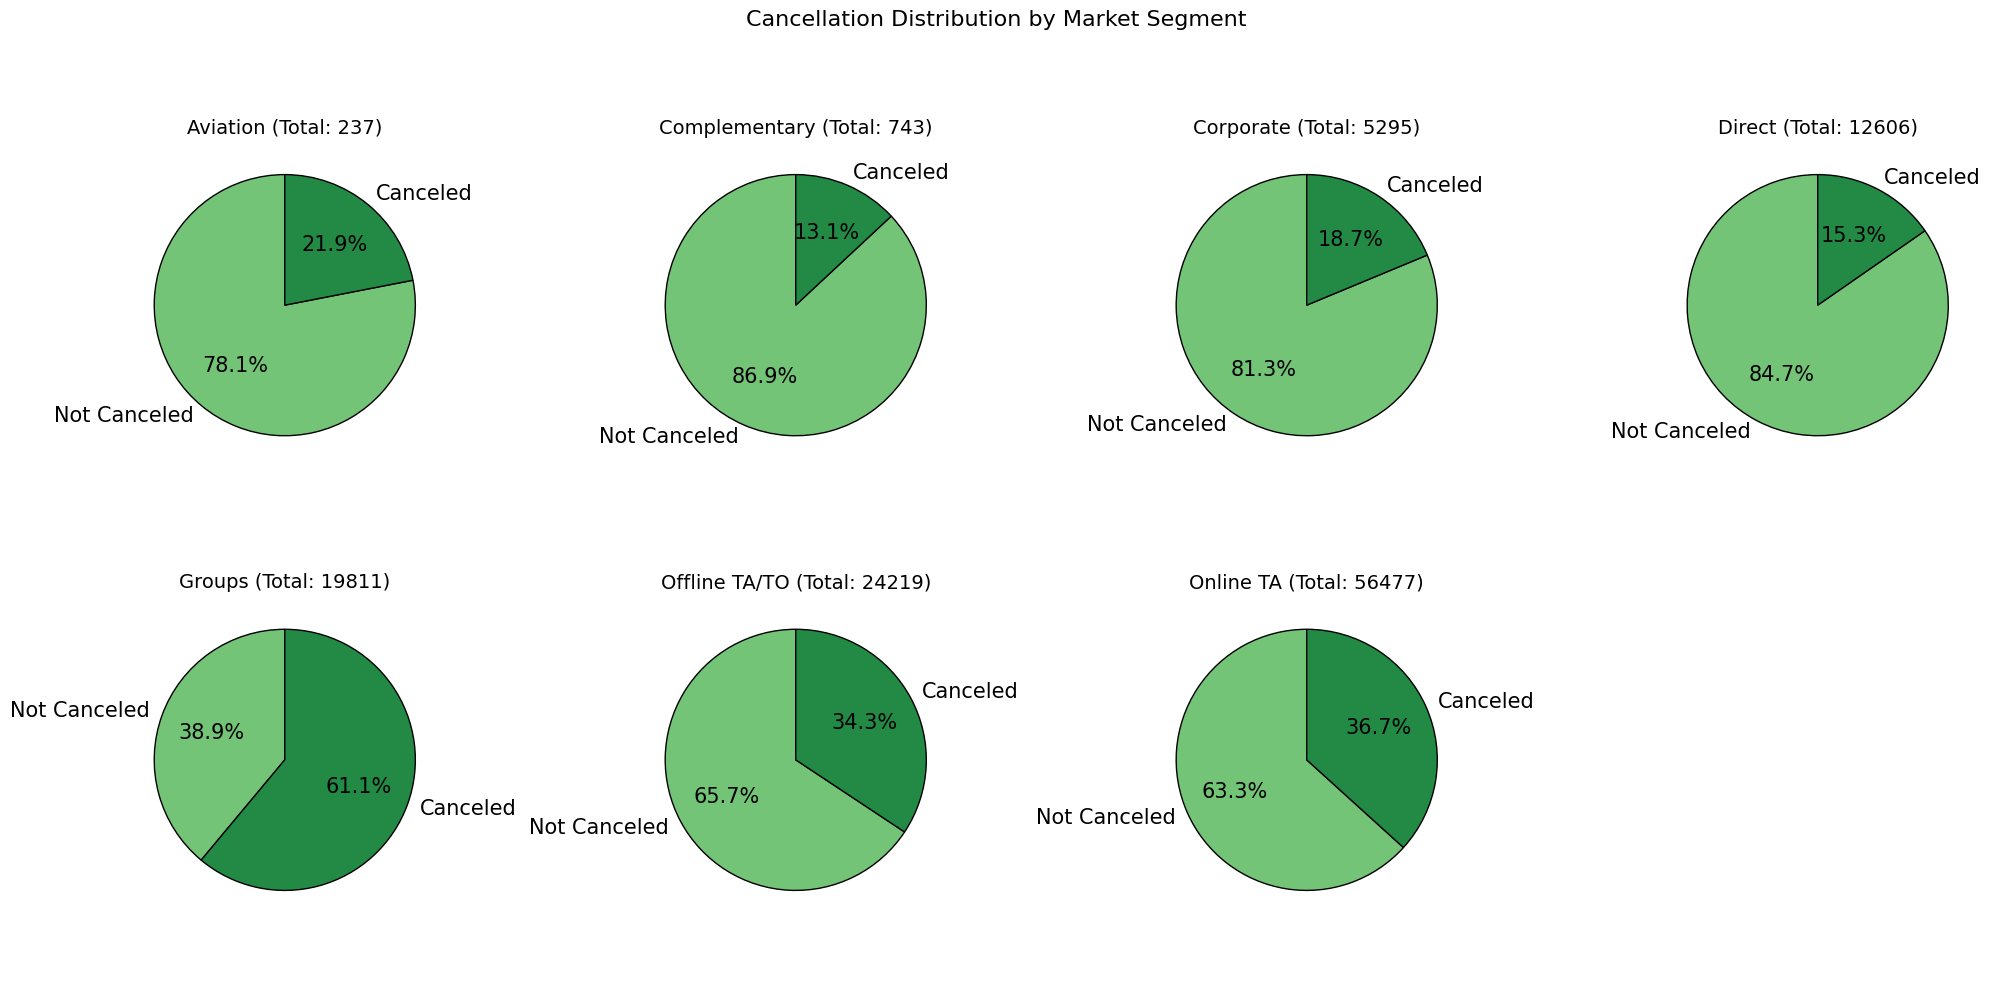

In [ ]:
market_segment_cancellation = df.groupby(['market_segment', 'is_canceled']).size().unstack(fill_value=0)
market_segment_cancellation = market_segment_cancellation[market_segment_cancellation.index != 'Undefined']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i, (segment, row) in enumerate(market_segment_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#73c477', '#238a45'],
                wedgeprops={'edgecolor': 'black'},
                textprops={'fontsize': 15})
    axes[i].set_title(f"{segment} (Total: {total})", fontsize=14)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Market Segment", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The graphs illustrate hotel cancellation patterns by market segment. The first chart highlights that "Groups" account for the highest cancellation rate (30.4%), followed by "Online TA" (18.3%) and "Offline TA/TO" (17.1%). In contrast, segments like "Complementary" and "Corporate" exhibit significantly lower cancellation rates, at 6.5% and 9.3%, respectively. The second set of charts further breaks down cancellations within each segment. Notably, "Groups," "Online TA," and "Offline TA/TO" show relatively high percentages of cancellations (61.1%, 36.7%, and 34.3%), indicating these segments contribute heavily to overall cancellations. Conversely, "Complementary" and "Corporate" segments maintain lower cancellation ratios, suggesting more reliable bookings. These insights could guide strategies to minimize cancellations, particularly within the high-risk segments.

### 5) Cancelation by Distribution channel

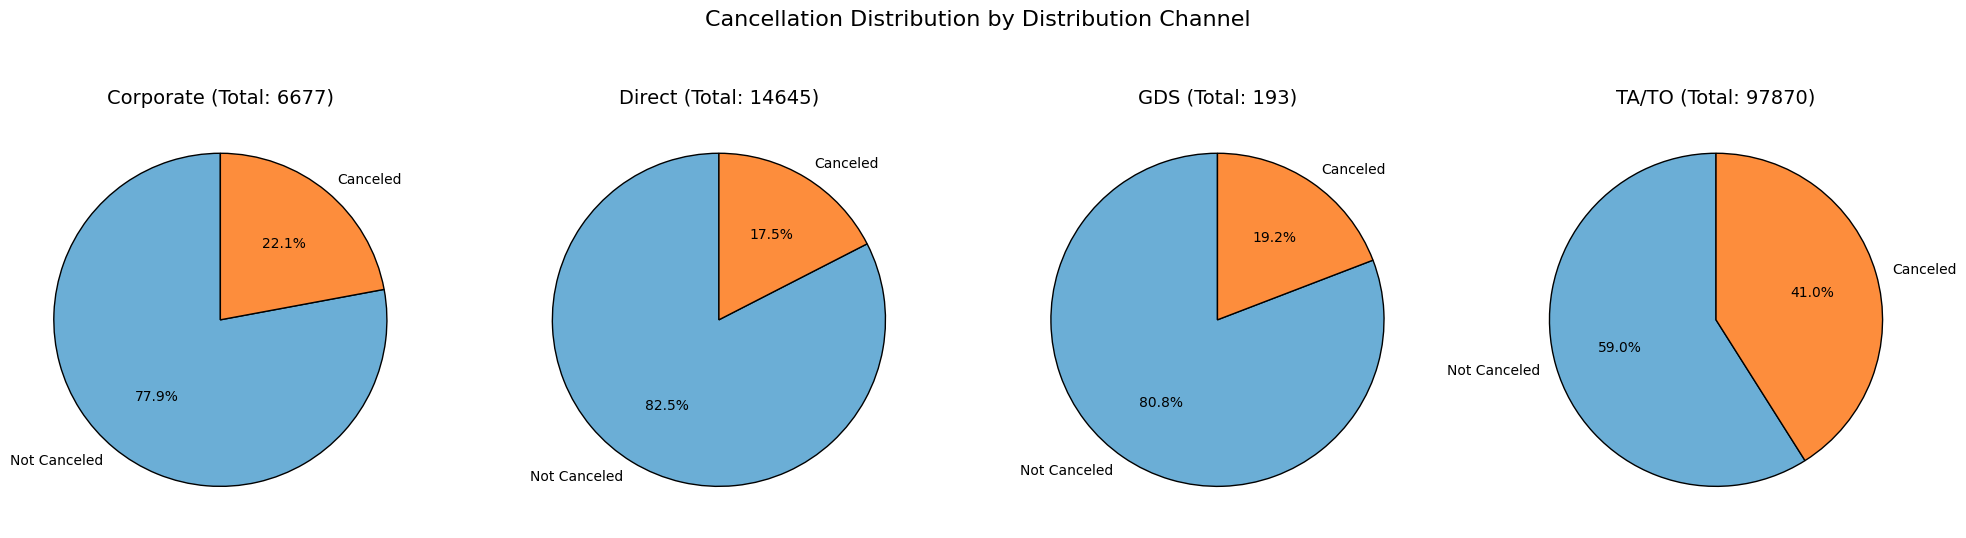

In [ ]:
distribution_channel_cancellation = df.groupby(['distribution_channel', 'is_canceled']).size().unstack(fill_value=0)
distribution_channel_cancellation = distribution_channel_cancellation[distribution_channel_cancellation.index != 'Undefined']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
for i, (channel, row) in enumerate(distribution_channel_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{channel} (Total: {total})", fontsize=14)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Distribution Channel", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The graphs show hotel cancellation distributions across different distribution channels. "TA/TO" (Travel Agents/Tour Operators) stands out with the highest cancellation rate at 41%, indicating it is a significant driver of cancellations. In contrast, channels like "Direct," "Corporate," and "GDS" (Global Distribution System) have notably lower cancellation rates, at 17.5%, 22.1%, and 19.2%, respectively, suggesting these channels are more reliable. Despite the high cancellation rate for "TA/TO," its large volume of bookings (97,870 total) makes it critical for revenue. These insights suggest that managing cancellations within the "TA/TO" channel should be a priority while leveraging the stability of direct and corporate channels.

### 6) Cancelation by Customer type

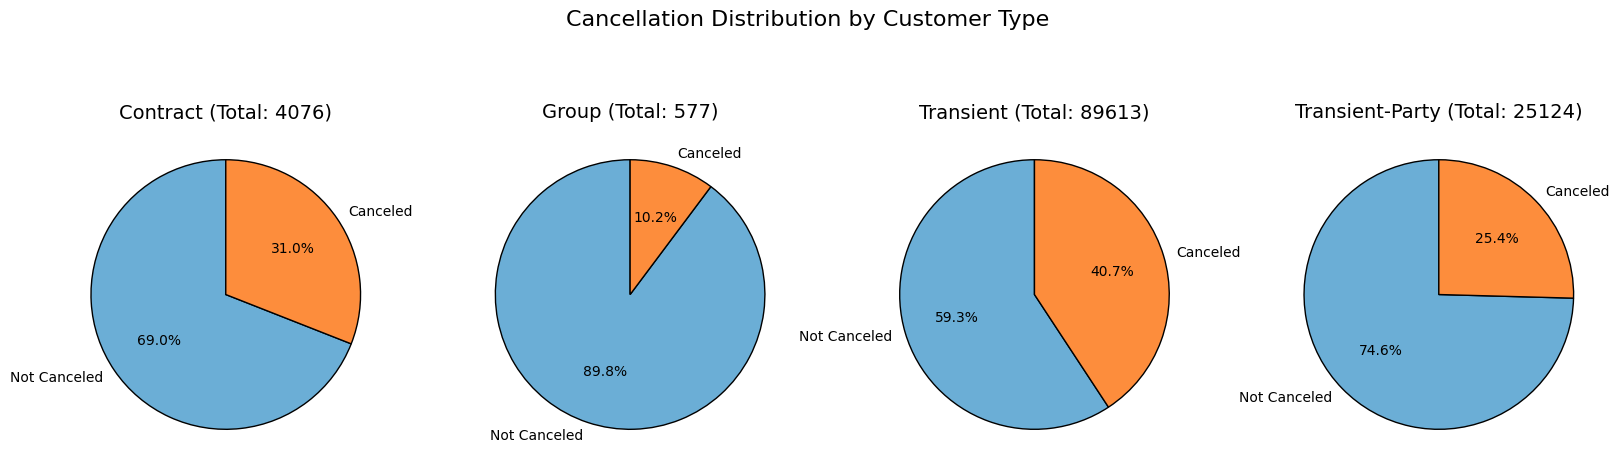

In [ ]:
customer_type_cancellation = df.groupby(['customer_type', 'is_canceled']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
for i, (customer, row) in enumerate(customer_type_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{customer} (Total: {total})", fontsize=14)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Customer Type", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


The graphs illustrate hotel booking cancellations based on customer types. The Transient category has the highest cancellation rate at 40.7%, which is significant given its large volume (89,613 total bookings). This indicates transient customers are less committed to their bookings.

In contrast, Group customers have the lowest cancellation rate at only 10.2%, suggesting more reliability in group bookings.

Transient-Party customers exhibit a moderate cancellation rate of 25.4%, whereas Contract customers show a relatively higher cancellation rate at 31.0%, which may indicate some flexibility in contract agreements or last-minute changes.

These patterns highlight the need for strategies to mitigate cancellations, particularly in the transient segment, while maintaining engagement with groups and transient-party customers.

### 7) Cancelation by Room type

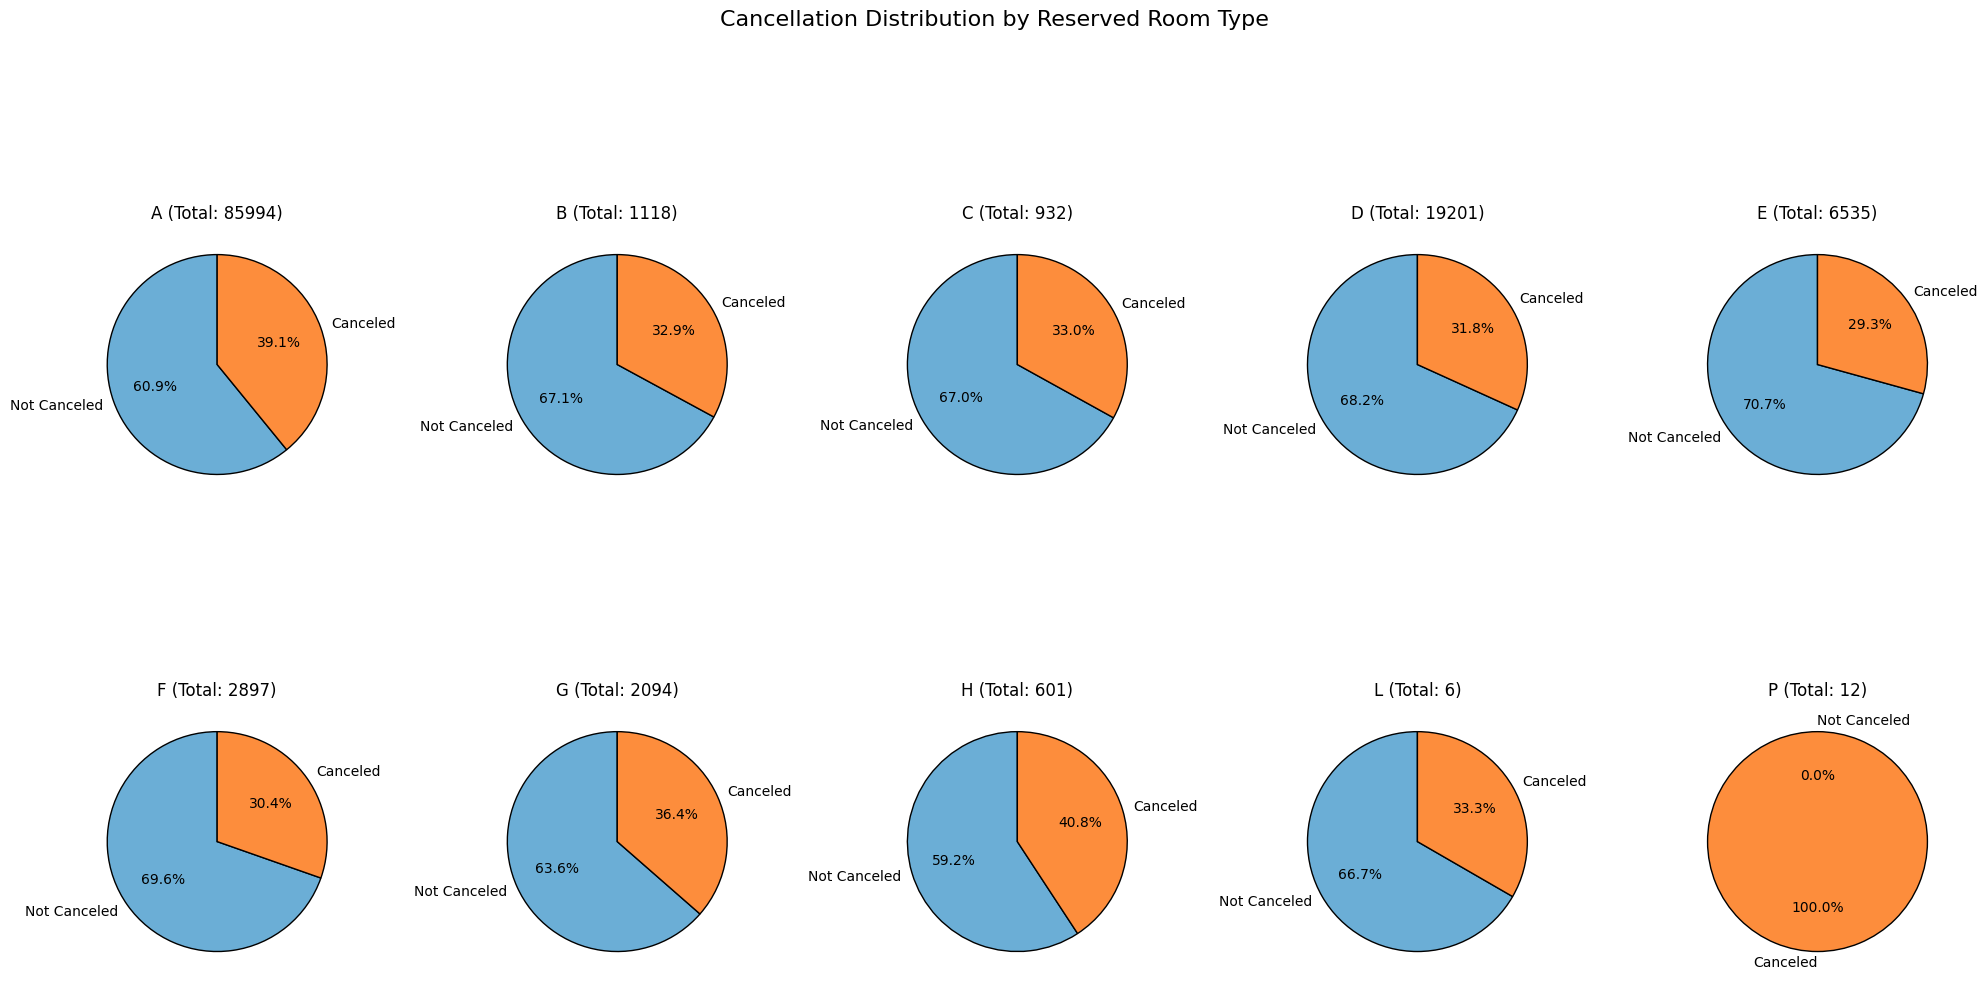

In [ ]:
reserved_room_type_cancellation = df.groupby(['reserved_room_type', 'is_canceled']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
axes = axes.flatten()
for i, (room_type, row) in enumerate(reserved_room_type_cancellation.iterrows()):
    total = row.sum() 
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{room_type} (Total: {total})", fontsize=12)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Reserved Room Type", fontsize=16)
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.show()

### 8) Cancelation by Deposit type

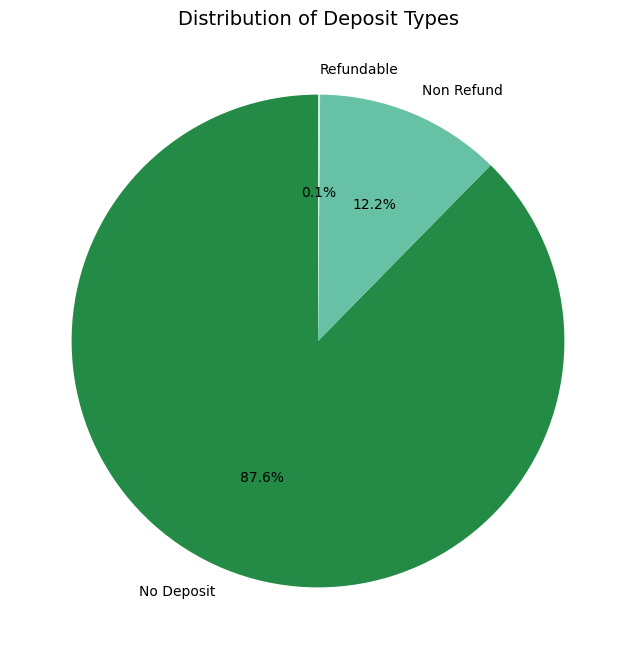

In [ ]:
deposit_type_counts = df['deposit_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(deposit_type_counts, 
        labels=deposit_type_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("BuGn_r", n_colors=len(deposit_type_counts)))
plt.title("Distribution of Deposit Types", fontsize=14)
plt.show()

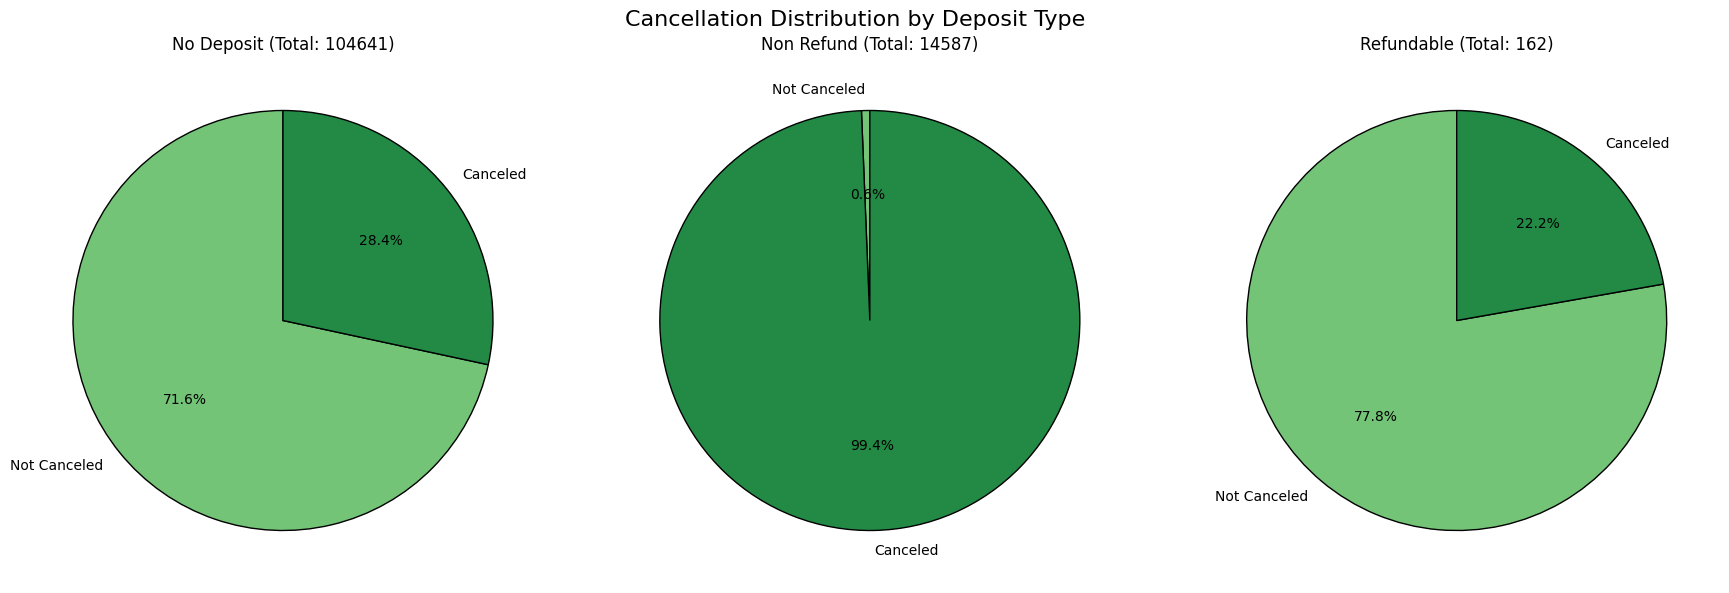

In [ ]:
deposit_type_cancellation = df.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()
for i, (deposit, row) in enumerate(deposit_type_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#73c477', '#238a45'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{deposit} (Total: {total})", fontsize=12)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Deposit Type", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  
plt.show()


The pie charts compare cancellation rates across different deposit types. 

1. **No Deposit:** Out of 104,641 reservations, 28.4% were canceled, indicating a relatively lower cancellation rate when no upfront payment is required. 
2. **Non-Refundable:** Among 14,587 reservations, an overwhelming 99.4% were canceled, suggesting that the inability to recover funds strongly correlates with cancellations.
3. **Refundable:** For 162 bookings, 22.2% were canceled, the lowest cancellation rate among the deposit types, likely because customers feel secure with the refund option.

This analysis highlights that the deposit policy significantly influences cancellation behavior, with non-refundable deposits having the highest cancellation rates.

# Training Models

## RandomForestClassifier For Cancellations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     14907
        True       0.98      0.90      0.93      8971

    accuracy                           0.95     23878
   macro avg       0.96      0.94      0.95     23878
weighted avg       0.95      0.95      0.95     23878



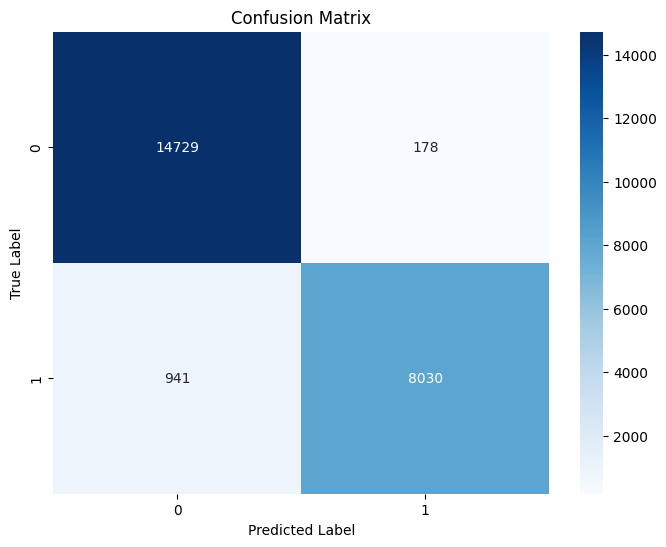

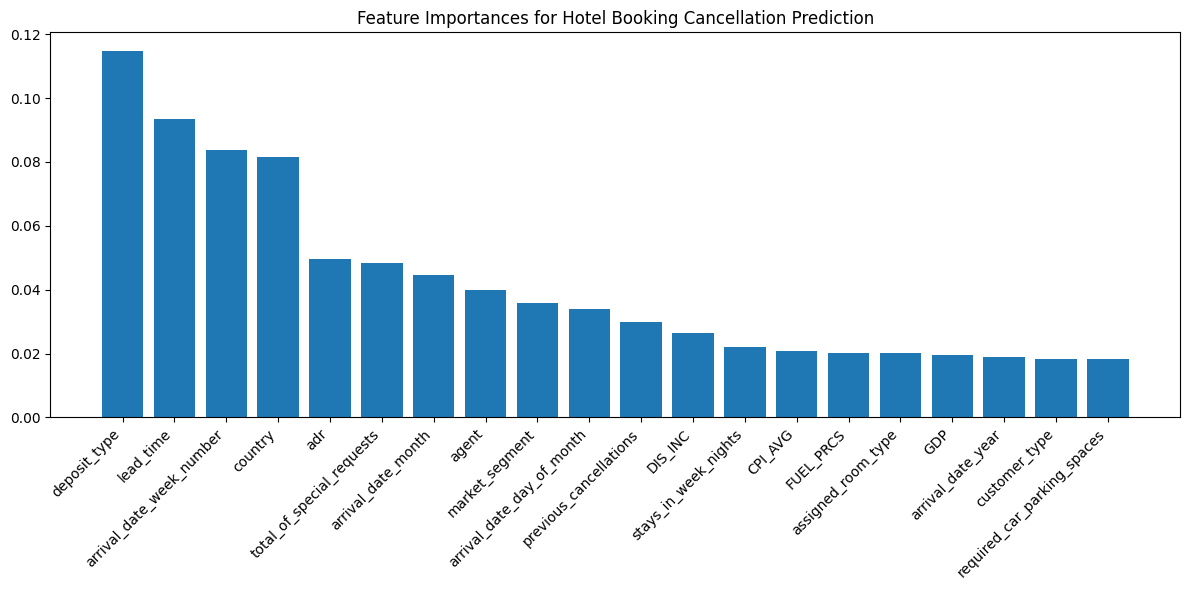


Top 20 Most Important Features:
deposit_type: 0.1149
lead_time: 0.0934
arrival_date_week_number: 0.0837
country: 0.0817
adr: 0.0498
total_of_special_requests: 0.0485
arrival_date_month: 0.0446
agent: 0.0398
market_segment: 0.0360
arrival_date_day_of_month: 0.0340
previous_cancellations: 0.0299
DIS_INC: 0.0263
stays_in_week_nights: 0.0221
CPI_AVG: 0.0208
FUEL_PRCS: 0.0201
assigned_room_type: 0.0200
GDP: 0.0194
arrival_date_year: 0.0188
customer_type: 0.0183
required_car_parking_spaces: 0.0182


In [ ]:
def prepare_data(df):
    # Create a copy to avoid modifying the original dataframe
    df_model = df.copy()
    
    # Drop columns that shouldn't be used for prediction
    columns_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
    
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_columns:
        if column in df_model.columns:
            df_model[column] = le.fit_transform(df_model[column].astype(str))
    
    return df_model

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    return rf, X_train, X_test, y_train, y_test, y_pred

def plot_feature_importance(rf, feature_names):
    # Get feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances for Hotel Booking Cancellation Prediction")
    plt.bar(range(20), importances[indices][:20])
    plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print numerical values
    print("\nTop 20 Most Important Features:")
    for i in range(20):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

def analyze_cancellations():
    # Prepare the data
    df_model = prepare_data(df)
    
    # Separate features and target
    X = df_model.drop('is_canceled', axis=1)
    y = df_model['is_canceled']
    
    # Train the model and get predictions
    rf, X_train, X_test, y_train, y_test, y_pred = train_random_forest(X, y)
    
    # Print model performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(rf, X.columns)
    
    return rf, X, y

# Run the analysis
rf_model, X, y = analyze_cancellations()

The strongest predictors of whether a booking will be cancelled are:
- (deposit, room rate) (around 10%)
- timing-related features (lead time, arrival dates). 

The type of deposit and how far in advance someone books (lead time) likely reflects their commitment level to the reservation.

These insights could be valuable for hotels to:

- Adjust deposit policies to reduce cancellations
- Pay special attention to bookings with longer lead times
- Consider country-specific marketing or policies
- Focus on managing special requests effectively

## RandomForestRegressor For Stay Duration


Top 5 Most Important Features:
                      feature  importance
8        stays_in_week_nights    0.909466
7     stays_in_weekend_nights    0.090224
26                        adr    0.000044
6   arrival_date_day_of_month    0.000032
28  total_of_special_requests    0.000022

Model Performance:
Mean Squared Error: 0.01
R-squared Score: 1.00


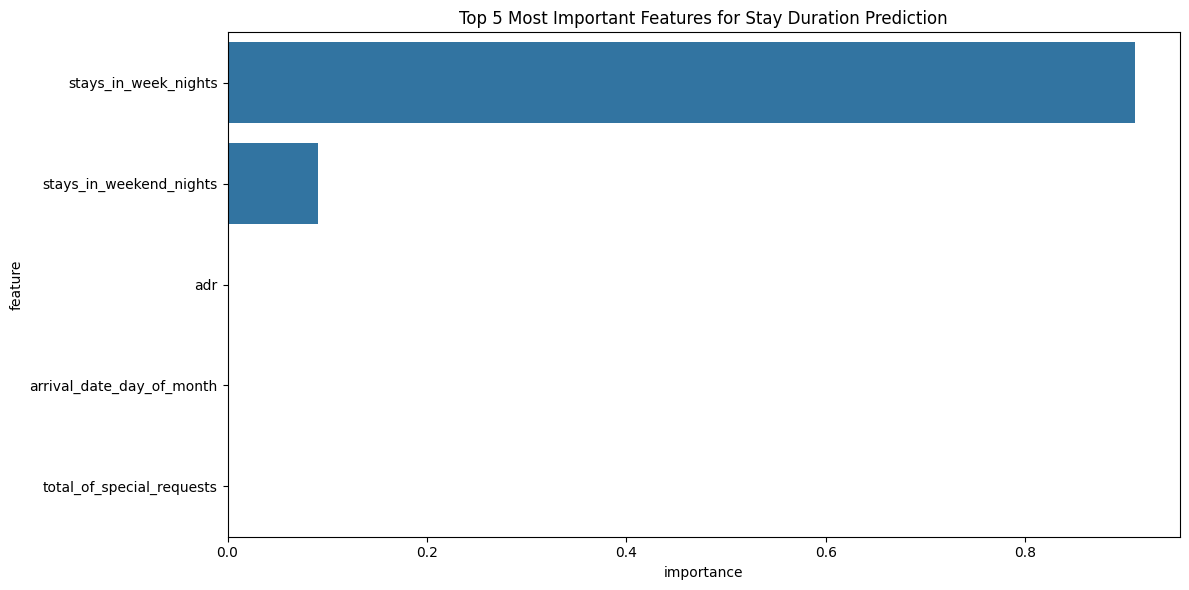

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def prepare_data(df):
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
    cols_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    X = df.drop(columns=cols_to_drop + ['total_nights'])
    y = df['total_nights']
    categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'agent']
    for col in categorical_cols:
        X[col] = pd.Categorical(X[col]).codes
    return X, y

def train_model_and_analyze(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    return importance, mse, r2, rf

def plot_feature_importance(importance):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=importance.head(5))
    plt.title('Top 5 Most Important Features for Stay Duration Prediction')
    plt.tight_layout()
    plt.show()

X, y = prepare_data(df)
importance, mse, r2, rf = train_model_and_analyze(X, y)
print("\nTop 5 Most Important Features:")
print(importance.head(5))
print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
plot_feature_importance(importance)

The strongest predictors of whether a customer will be staying for more nights are:
- Weekday Stays (stays_in_week_nights)
- Weekend Stays (stays_in_weekend_nights)

Business Implications

Weekday Focus

- Clear opportunity for targeting business travelers
- Potential for extended stay promotions during weekdays
- Resource allocation should prioritize weekday operations


Weekend Strategy

- Different approach needed for weekend bookings
- Focus on quality over duration for weekend guests
- Opportunity for weekend-specific packages


Pricing Strategy

- Consider value-added services over price adjustments over the weekdays
- Different pricing strategies for weekday vs weekend stays